In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

import numpy as np
import seaborn as sns

In [2]:
# Get NASDAQ-100 tickers using Wikipedia
import requests
from bs4 import BeautifulSoup

def get_nasdaq100_tickers():
    url = "https://en.wikipedia.org/wiki/Nasdaq-100"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the table with Nasdaq-100 components
    tables = soup.find_all('table', {'class': 'wikitable'})
    for table in tables:
        if 'Ticker' in str(table):
            df = pd.read_html(str(table))[0]
            # Get the ticker column (may need adjustment based on Wikipedia table structure)
            tickers = df['Ticker'].tolist()
            return tickers
    return []


In [3]:

# Get NASDAQ-100 tickers
nasdaq100_tickers = get_nasdaq100_tickers()

# Get NASDAQ composite index data
nasdaq = yf.Ticker("^IXIC")
nasdaq_data = nasdaq.history(period="5y")

# Download historical data for all NASDAQ-100 stocks
stock_data = {}
print("Downloading data for NASDAQ-100 stocks...")

for ticker in nasdaq100_tickers:
    try:
        stock = yf.Ticker(ticker)
        data = stock.history(period="5y")['Close']
        if not data.empty:
            stock_data[ticker] = data
            print(f"Downloaded {ticker}")
    except Exception as e:
        print(f"Error downloading {ticker}: {e}")


/var/folders/cp/7c6k737x57g8s1kf7jnph2rm0000gn/T/ipykernel_24520/65577394.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


Downloaded ADBE
Downloaded AMD
Downloaded ABNB
Downloaded GOOGL
Downloaded GOOG
Downloaded AMZN
Downloaded AEP
Downloaded AMGN
Downloaded ADI
Downloaded ANSS
Downloaded AAPL
Downloaded AMAT
Downloaded APP
Downloaded ARM
Downloaded ASML
Downloaded AZN
Downloaded TEAM
Downloaded ADSK
Downloaded ADP
Downloaded AXON
Downloaded BKR
Downloaded BIIB
Downloaded BKNG
Downloaded AVGO
Downloaded CDNS
Downloaded CDW
Downloaded CHTR
Downloaded CTAS
Downloaded CSCO
Downloaded CCEP
Downloaded CTSH
Downloaded CMCSA
Downloaded CEG
Downloaded CPRT
Downloaded CSGP
Downloaded COST
Downloaded CRWD
Downloaded CSX
Downloaded DDOG
Downloaded DXCM
Downloaded FANG
Downloaded DASH
Downloaded EA
Downloaded EXC
Downloaded FAST
Downloaded FTNT
Downloaded GEHC
Downloaded GILD
Downloaded GFS
Downloaded HON
Downloaded IDXX
Downloaded INTC
Downloaded INTU
Downloaded ISRG
Downloaded KDP
Downloaded KLAC
Downloaded KHC
Downloaded LRCX
Downloaded LIN
Downloaded LULU
Downloaded MAR
Downloaded MRVL
Downloaded MELI
Downloaded


Successfully downloaded data for 101 stocks

First few rows of the price data:
                                 ADBE        AMD  ABNB      GOOGL       GOOG  \
Date                                                                           
2020-04-27 00:00:00-04:00  348.500000  56.490002   NaN  63.240650  63.493267   
2020-04-28 00:00:00-04:00  333.450012  55.509998   NaN  61.336250  61.392712   
2020-04-29 00:00:00-04:00  349.170013  53.660000   NaN  66.789680  66.757797   
2020-04-30 00:00:00-04:00  353.640015  52.389999   NaN  67.014603  67.115105   
2020-05-01 00:00:00-04:00  343.839996  49.880001   NaN  65.552597  65.719223   

                                 AMZN        AEP        AMGN         ADI  \
Date                                                                       
2020-04-27 00:00:00-04:00  118.800003  69.603645  207.902405   98.701057   
2020-04-28 00:00:00-04:00  115.704002  70.444328  203.820297   98.317337   
2020-04-29 00:00:00-04:00  118.635498  69.195770  202.1

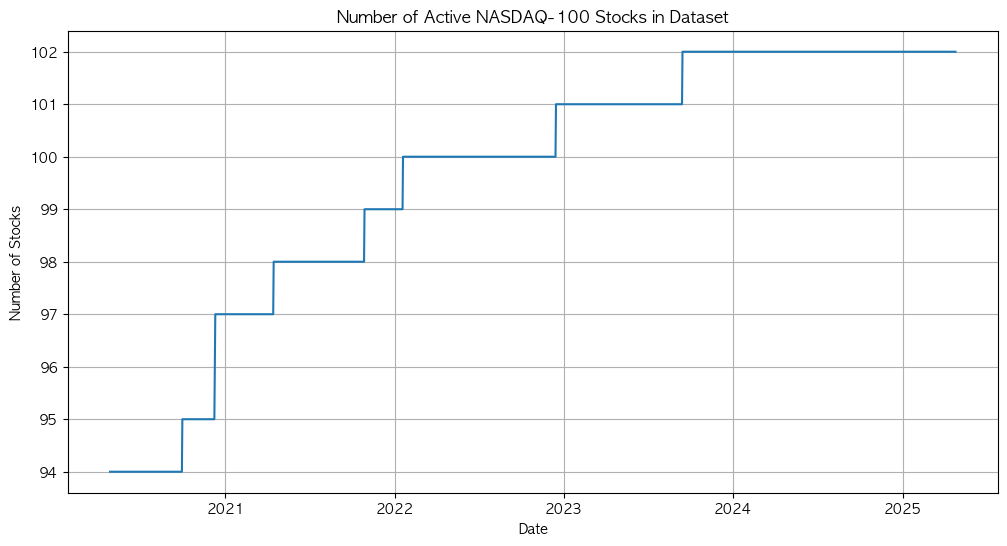

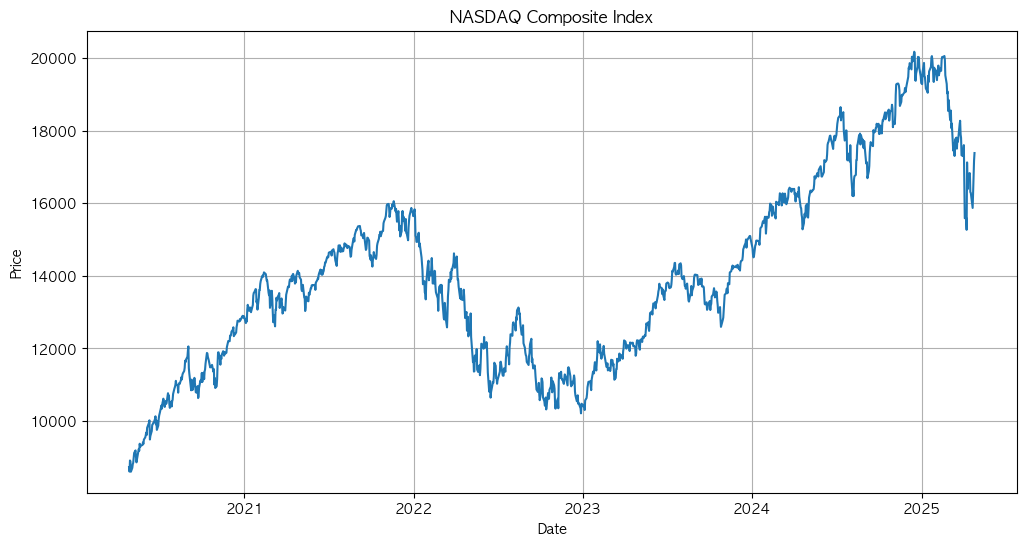

In [4]:

# Create DataFrame with all stock prices
prices = pd.DataFrame(stock_data)
prices['NASDAQ'] = nasdaq_data['Close']  # Add NASDAQ composite

# Calculate daily returns
returns = prices.pct_change()

# Display basic information
print(f"\nSuccessfully downloaded data for {len(stock_data)} stocks")
print("\nFirst few rows of the price data:")
print(prices.head())

# Plot number of stocks over time
plt.figure(figsize=(12, 6))
plt.plot(prices.count(axis=1))
plt.title('Number of Active NASDAQ-100 Stocks in Dataset')
plt.xlabel('Date')
plt.ylabel('Number of Stocks')
plt.grid(True)
plt.show()

# Plot NASDAQ composite index
plt.figure(figsize=(12, 6))
plt.plot(prices['NASDAQ'])
plt.title('NASDAQ Composite Index')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [5]:
# Find the period where we have data for all companies
valid_dates = prices.dropna(axis=0, how='any').index
print(f"\nAnalyzing period from {valid_dates[0].date()} to {valid_dates[-1].date()}")
print(f"Number of trading days: {len(valid_dates)}")

# Get prices only for the valid period where we have all companies
complete_prices = prices.loc[valid_dates].drop('NASDAQ', axis=1)
print(f"Number of stocks: {complete_prices.shape[1]}")



Analyzing period from 2023-09-14 to 2025-04-25
Number of trading days: 405
Number of stocks: 101


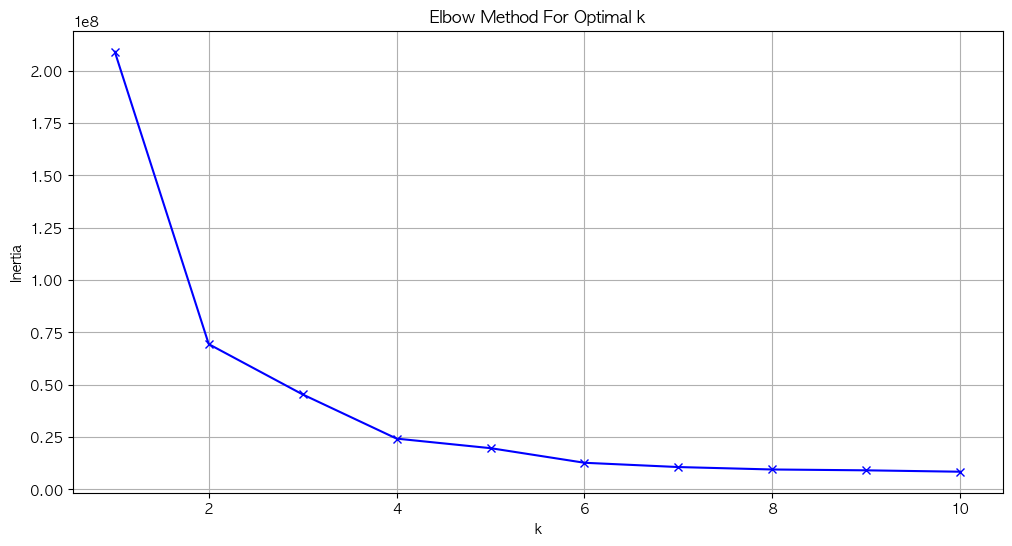

In [6]:
# %%
# Normalize prices to start at 100 for fair comparison
from sklearn.cluster import KMeans
normalized_prices = complete_prices / complete_prices.iloc[0] * 100

# Determine optimal number of clusters using elbow method
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_prices.T)  # Transpose to cluster stocks, not timestamps
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(12, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


Cluster 1 members (40 stocks):
ADBE, ABNB, ANSS, AZN, TEAM, BKR, BIIB, CDW, CHTR, CSCO, CTSH, CMCSA, CSGP, CSX, DXCM, EXC, GFS, HON, IDXX, INTC, KDP, KHC, LULU, MCHP, MDLZ, MDB, MNST, ODFL, ON, PYPL, PEP, REGN, ROP, SBUX, TSLA, TTD, VRSK, WBD, WDAY, XEL

Cluster 2 members (1 stocks):
MSTR

Cluster 3 members (1 stocks):
APP

Cluster 4 members (9 stocks):
ARM, AXON, AVGO, CEG, CRWD, DASH, META, NFLX, NVDA

Cluster 5 members (1 stocks):
PLTR

Cluster 6 members (49 stocks):
AMD, GOOGL, GOOG, AMZN, AEP, AMGN, ADI, AAPL, AMAT, ASML, ADSK, ADP, BKNG, CDNS, CTAS, CCEP, CPRT, COST, DDOG, FANG, EA, FAST, FTNT, GEHC, GILD, INTU, ISRG, KLAC, LRCX, LIN, MAR, MRVL, MELI, MU, MSFT, NXPI, ORLY, PCAR, PANW, PAYX, PDD, QCOM, ROST, SNPS, TTWO, TMUS, TXN, VRTX, ZS


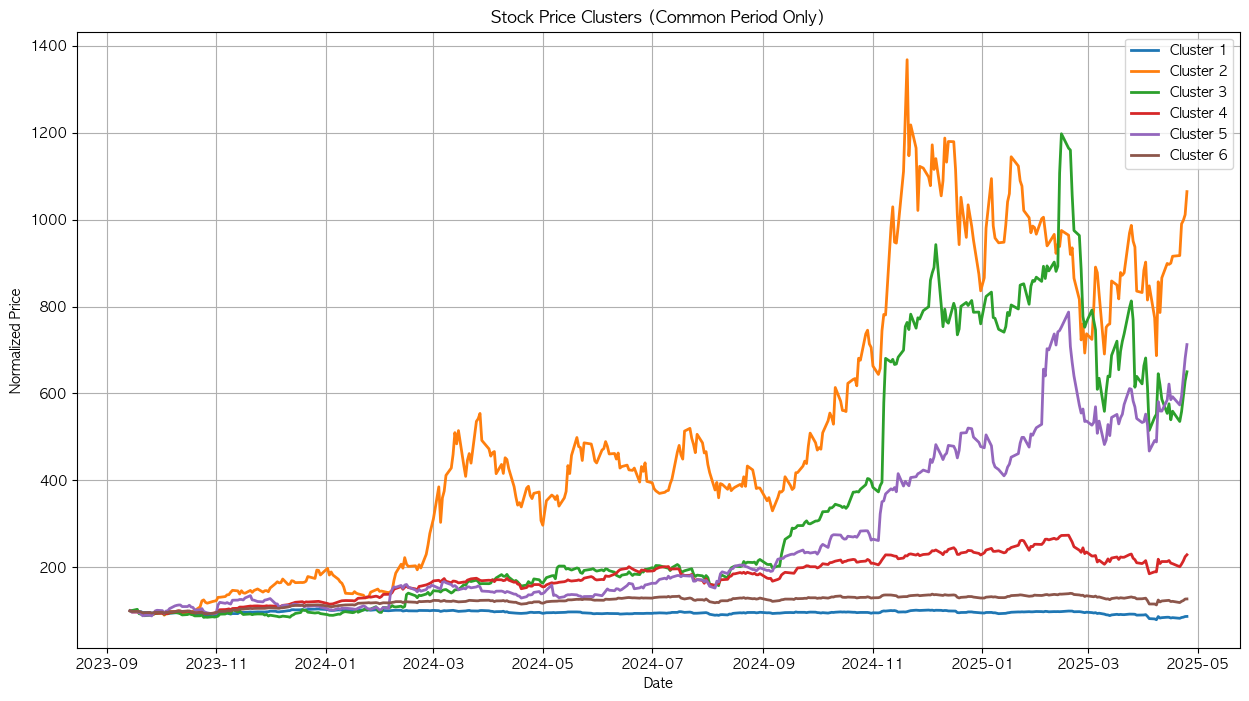


Cluster Summary Statistics:

Cluster 1:
Average Return: -0.0001
Return Std Dev: 0.0116

Cluster 2:
Average Return: 0.0079
Return Std Dev: 0.0640

Cluster 3:
Average Return: 0.0060
Return Std Dev: 0.0511

Cluster 4:
Average Return: 0.0026
Return Std Dev: 0.0220

Cluster 5:
Average Return: 0.0058
Return Std Dev: 0.0445

Cluster 6:
Average Return: 0.0008
Return Std Dev: 0.0124


In [7]:
# Choose optimal k (let's use 4 clusters) and perform final clustering
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(normalized_prices.T)

# Plot clusters
plt.figure(figsize=(15, 8))
for i in range(optimal_k):
    # Get tickers in this cluster
    cluster_tickers = normalized_prices.columns[clusters == i]
    
    # Plot mean trajectory of cluster
    cluster_mean = normalized_prices[cluster_tickers].mean(axis=1)
    plt.plot(normalized_prices.index, cluster_mean, linewidth=2, label=f'Cluster {i+1}')
    
    # Print cluster members and count
    print(f"\nCluster {i+1} members ({len(cluster_tickers)} stocks):")
    print(', '.join(cluster_tickers))

plt.title('Stock Price Clusters (Common Period Only)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

# Print summary statistics for each cluster
print("\nCluster Summary Statistics:")
for i in range(optimal_k):
    cluster_tickers = normalized_prices.columns[clusters == i]
    cluster_returns = returns.loc[valid_dates, cluster_tickers].mean(axis=1)
    print(f"\nCluster {i+1}:")
    print(f"Average Return: {cluster_returns.mean():.4f}")
    print(f"Return Std Dev: {cluster_returns.std():.4f}")



Analyzing Cluster 1
Best pair: BKR - CSCO (correlation: 0.8949)


/var/folders/cp/7c6k737x57g8s1kf7jnph2rm0000gn/T/ipykernel_24520/4127726797.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if z_score[i] > entry_threshold:
/var/folders/cp/7c6k737x57g8s1kf7jnph2rm0000gn/T/ipykernel_24520/4127726797.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif z_score[i] < -entry_threshold:
/var/folders/cp/7c6k737x57g8s1kf7jnph2rm0000gn/T/ipykernel_24520/4127726797.py:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, us

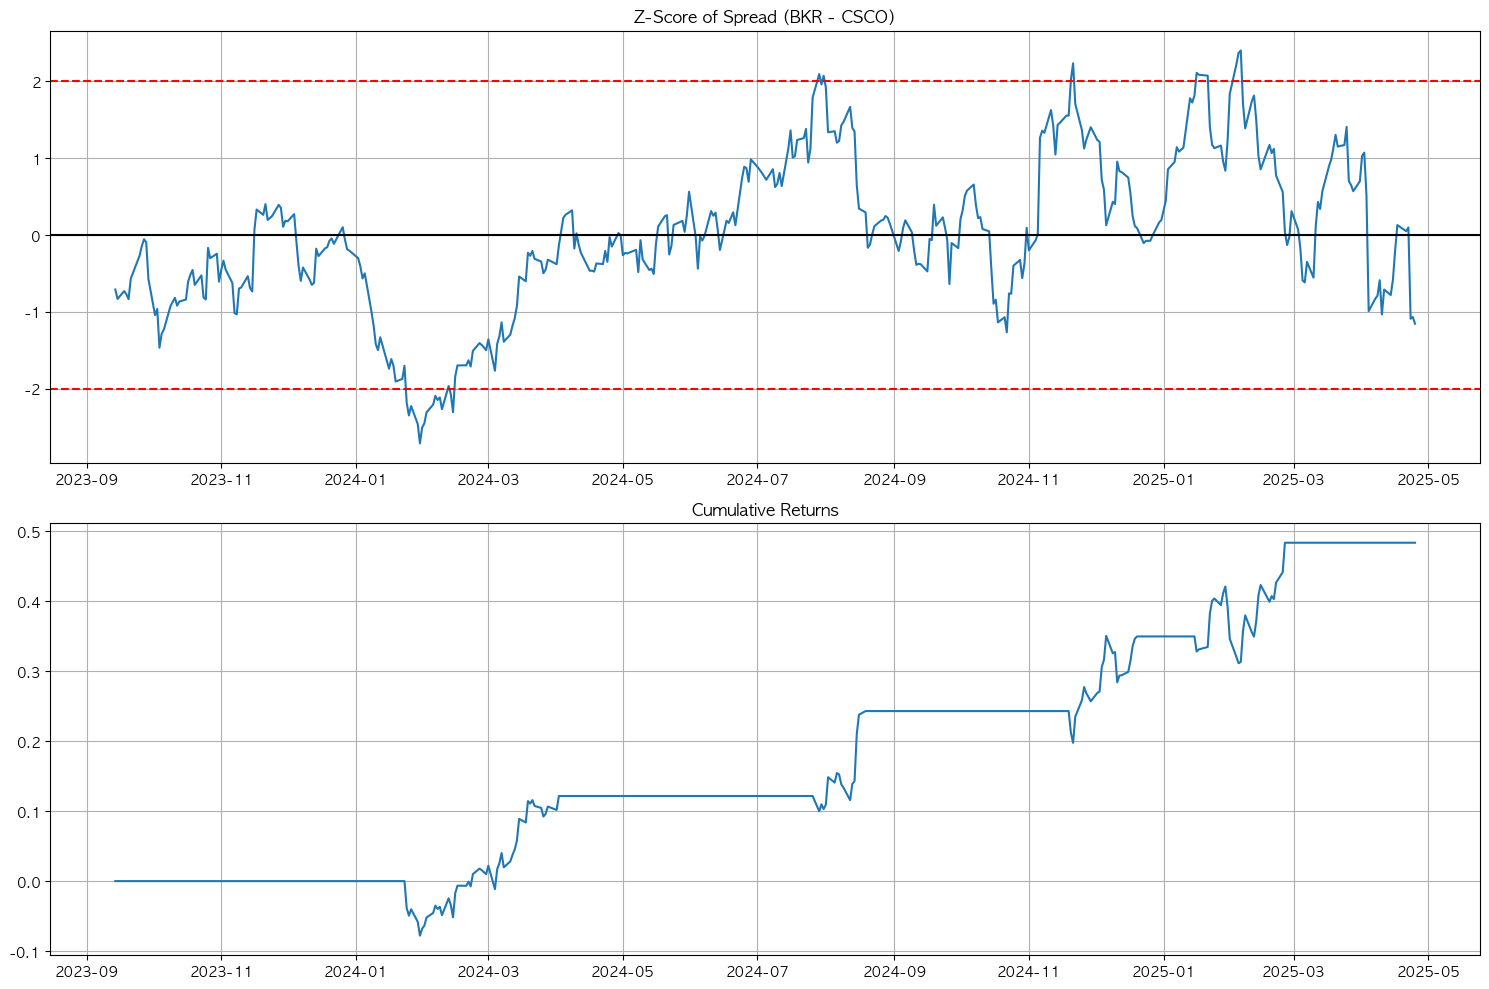

Sharpe Ratio: 1.80
Total Return: 48.38%

Analyzing Cluster 4
Best pair: DASH - NFLX (correlation: 0.9585)


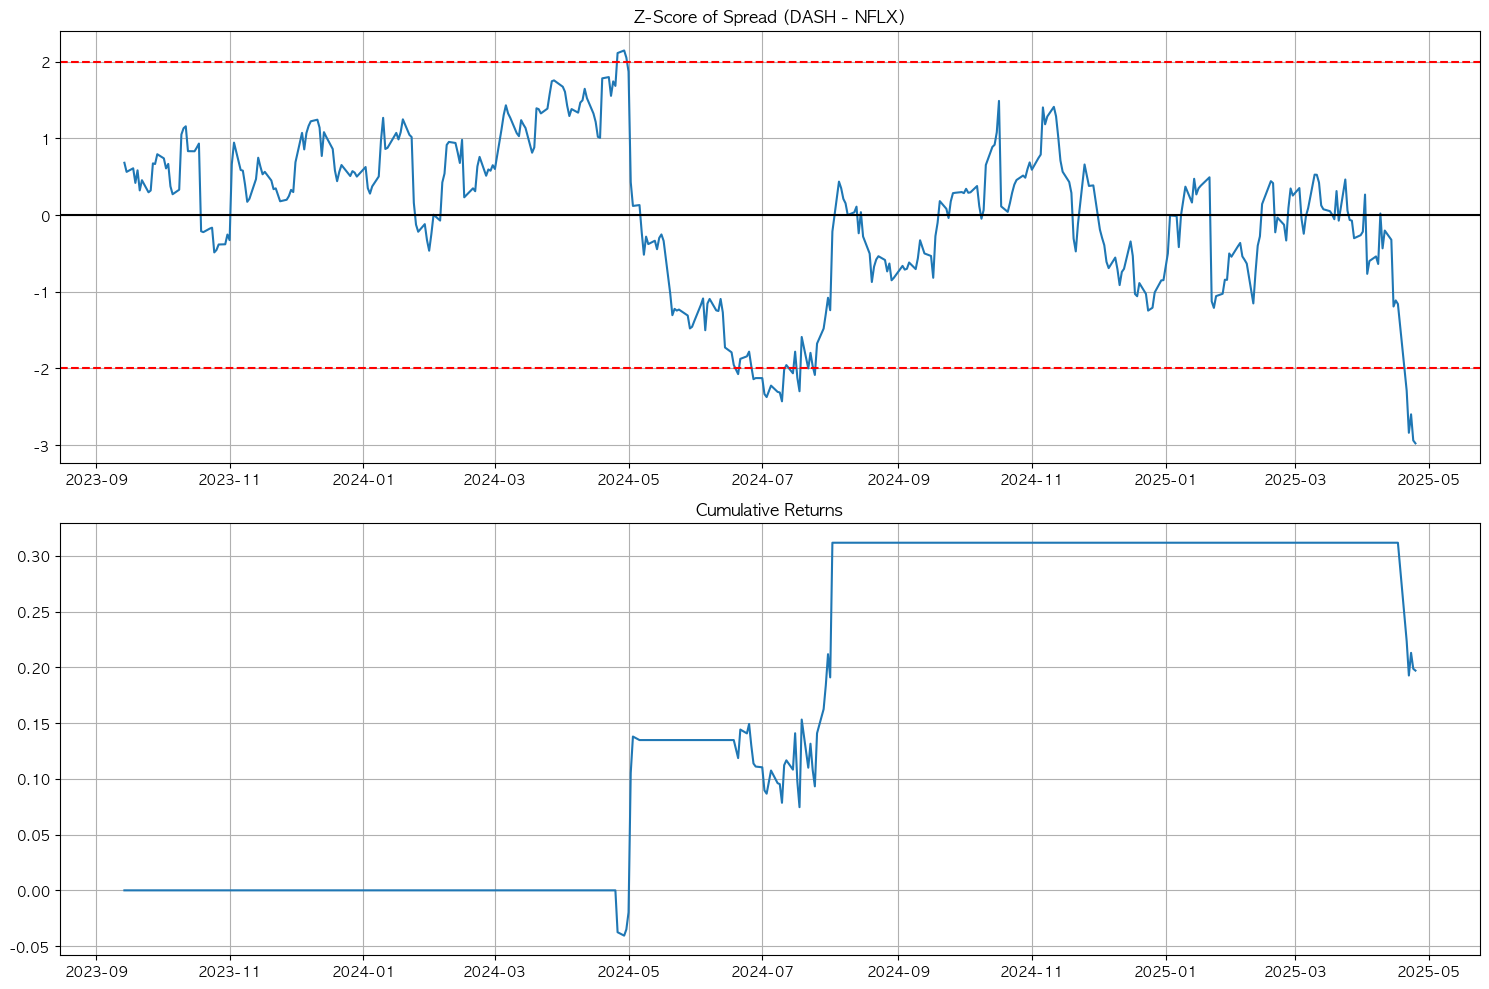

Sharpe Ratio: 0.71
Total Return: 19.70%

Analyzing Cluster 6
Best pair: GOOGL - GOOG (correlation: 0.9999)


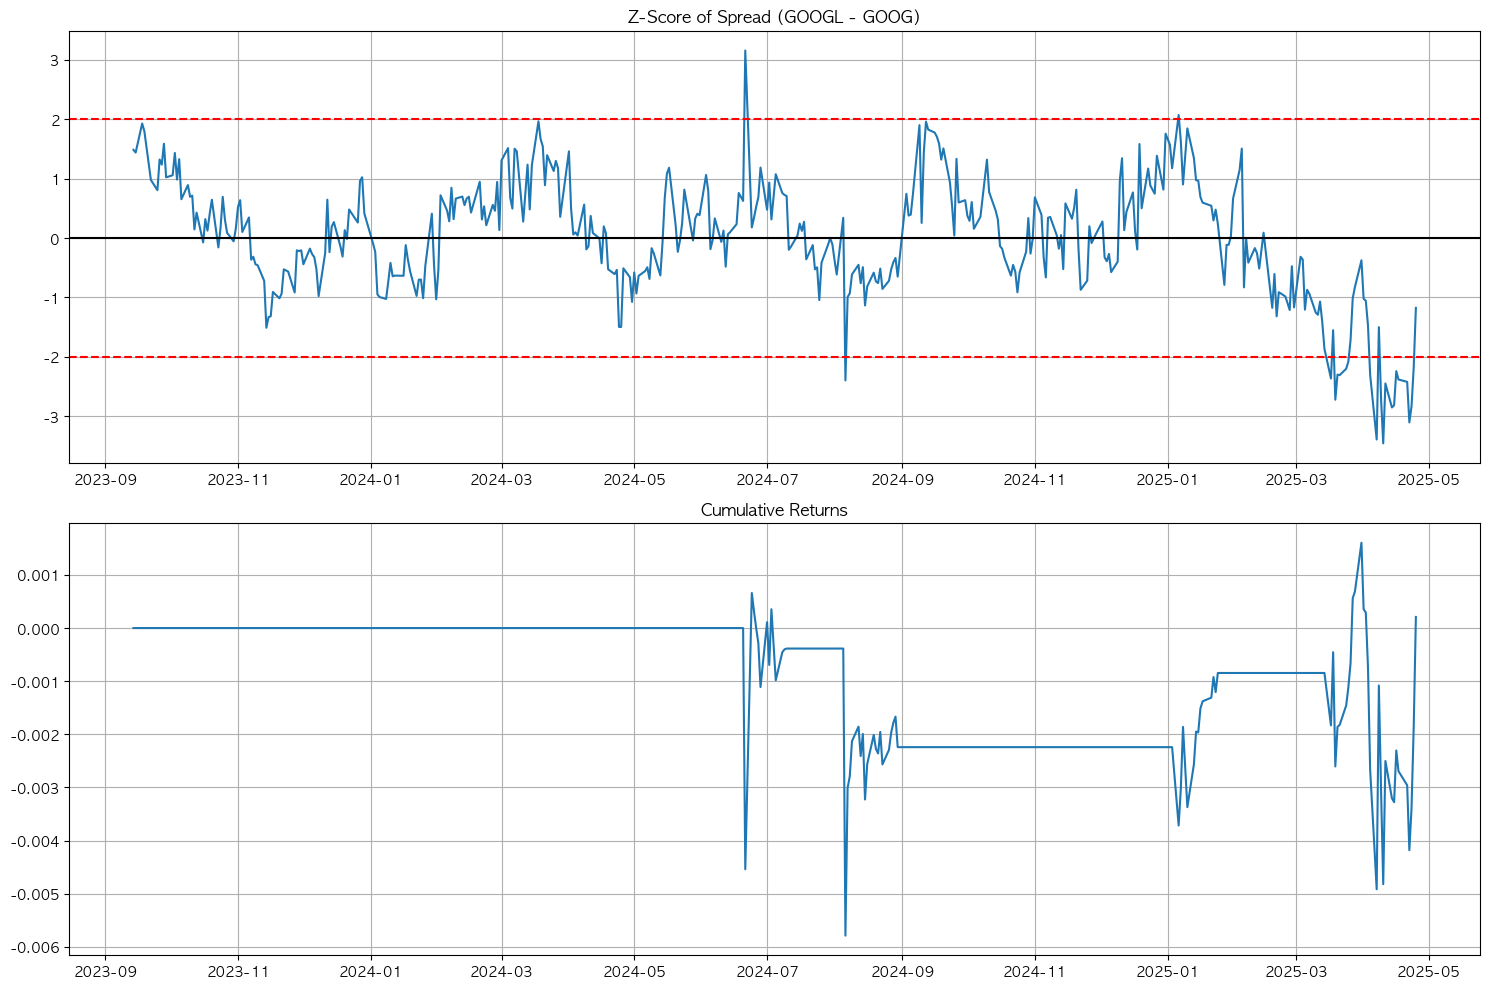

Sharpe Ratio: 0.02
Total Return: 0.02%

Overall Strategy Summary:

Cluster_1:
Pair: BKR - CSCO
Correlation: 0.8949
Sharpe Ratio: 1.80
Total Return: 48.38%

Cluster_4:
Pair: DASH - NFLX
Correlation: 0.9585
Sharpe Ratio: 0.71
Total Return: 19.70%

Cluster_6:
Pair: GOOGL - GOOG
Correlation: 0.9999
Sharpe Ratio: 0.02
Total Return: 0.02%


In [8]:
# Implement pair trading strategy for selected clusters (1, 4, 6)
selected_clusters = [0, 3, 5]  # Using 0-based indexing for clusters 1, 4, 6

# Dictionary to store results
pair_trading_results = {}

for cluster_idx in selected_clusters:
    print(f"\nAnalyzing Cluster {cluster_idx + 1}")
    
    # Get tickers in this cluster
    cluster_tickers = normalized_prices.columns[clusters == cluster_idx]
    cluster_prices = normalized_prices[cluster_tickers]
    
    # Calculate all possible pairs in the cluster
    pairs = []
    correlations = []
    for i in range(len(cluster_tickers)):
        for j in range(i+1, len(cluster_tickers)):
            stock1, stock2 = cluster_tickers[i], cluster_tickers[j]
            correlation = cluster_prices[stock1].corr(cluster_prices[stock2])
            pairs.append((stock1, stock2))
            correlations.append(correlation)
    
    # Select the pair with highest correlation
    best_pair_idx = np.argmax(correlations)
    stock1, stock2 = pairs[best_pair_idx]
    correlation = correlations[best_pair_idx]
    
    print(f"Best pair: {stock1} - {stock2} (correlation: {correlation:.4f})")
    
    # Calculate spread
    spread = cluster_prices[stock1] - cluster_prices[stock2]
    
    # Calculate z-score of spread
    z_score = (spread - spread.mean()) / spread.std()
    
    # Define trading signals
    entry_threshold = 2.0  # Enter position when |z-score| > 2
    exit_threshold = 0.0   # Exit position when z-score crosses 0
    
    # Initialize position and returns arrays
    position = np.zeros(len(z_score))
    returns = np.zeros(len(z_score))
    
    # Implement trading strategy
    for i in range(1, len(z_score)):
        # If no position is open
        if position[i-1] == 0:
            if z_score[i] > entry_threshold:
                position[i] = -1  # Short stock1, long stock2
            elif z_score[i] < -entry_threshold:
                position[i] = 1   # Long stock1, short stock2
        # If position is open
        else:
            if (position[i-1] == 1 and z_score[i] > exit_threshold) or \
               (position[i-1] == -1 and z_score[i] < exit_threshold):
                position[i] = 0   # Close position
            else:
                position[i] = position[i-1]  # Maintain position
        
        # Calculate returns
        if position[i] != 0:
            stock1_return = (cluster_prices[stock1].iloc[i] / cluster_prices[stock1].iloc[i-1] - 1)
            stock2_return = (cluster_prices[stock2].iloc[i] / cluster_prices[stock2].iloc[i-1] - 1)
            returns[i] = position[i] * (stock1_return - stock2_return)
    
    # Calculate strategy metrics
    cumulative_returns = np.cumprod(1 + returns) - 1
    sharpe_ratio = np.sqrt(252) * returns.mean() / returns.std()
    
    # Store results
    pair_trading_results[f"Cluster_{cluster_idx + 1}"] = {
        'pair': (stock1, stock2),
        'correlation': correlation,
        'cumulative_returns': cumulative_returns,
        'sharpe_ratio': sharpe_ratio
    }
    
    # Plot results
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 1, 1)
    plt.plot(cluster_prices.index, z_score)
    plt.axhline(y=entry_threshold, color='r', linestyle='--')
    plt.axhline(y=-entry_threshold, color='r', linestyle='--')
    plt.axhline(y=0, color='k', linestyle='-')
    plt.title(f'Z-Score of Spread ({stock1} - {stock2})')
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(cluster_prices.index, cumulative_returns)
    plt.title('Cumulative Returns')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Total Return: {cumulative_returns[-1]:.2%}")

# Print overall summary
print("\nOverall Strategy Summary:")
for cluster, results in pair_trading_results.items():
    print(f"\n{cluster}:")
    print(f"Pair: {results['pair'][0]} - {results['pair'][1]}")
    print(f"Correlation: {results['correlation']:.4f}")
    print(f"Sharpe Ratio: {results['sharpe_ratio']:.2f}")
    print(f"Total Return: {results['cumulative_returns'][-1]:.2%}")


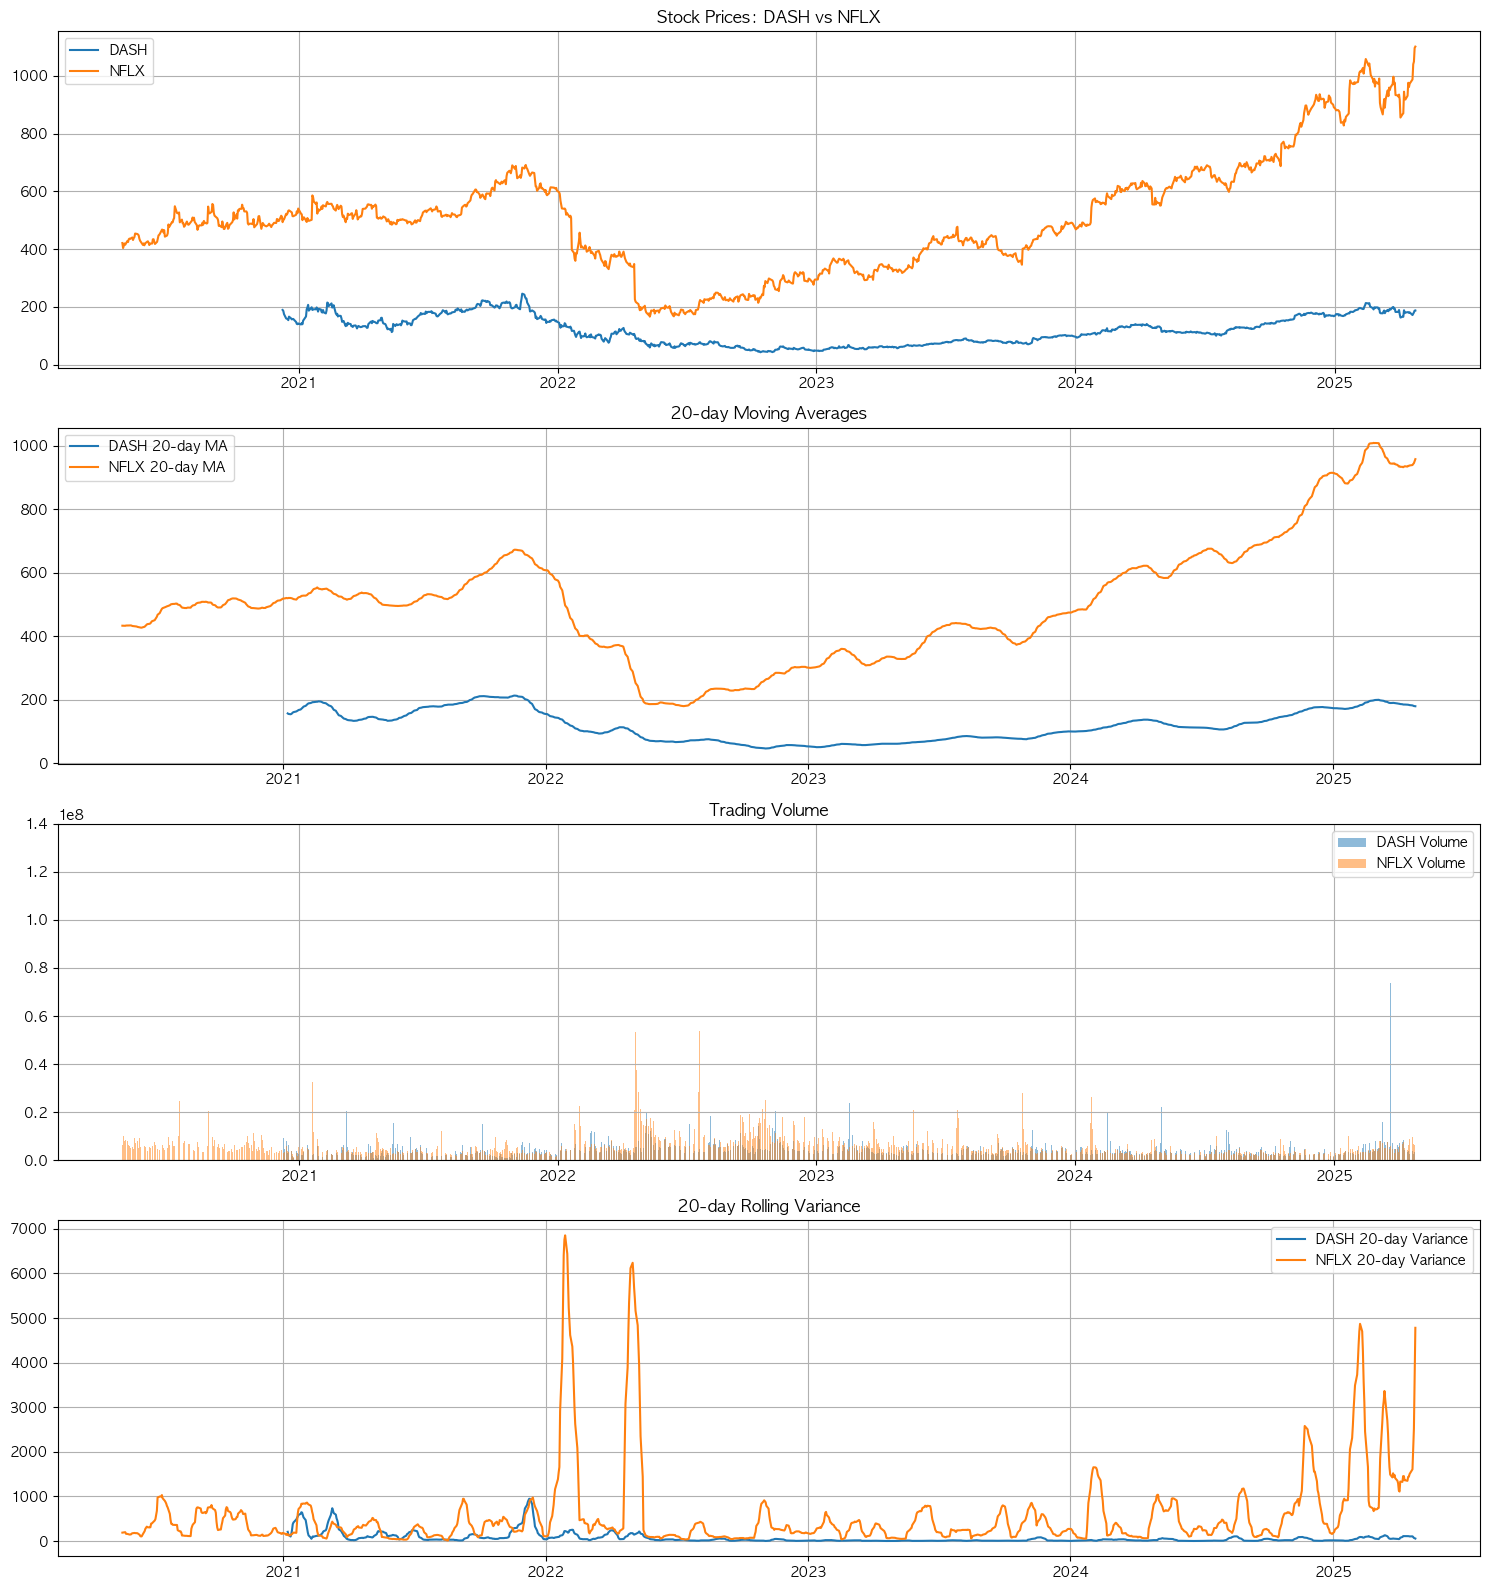

In [16]:
# Plot DASH and NFLX prices and indicators
dash = yf.Ticker("DASH")
nflx = yf.Ticker("NFLX")

dash_data = dash.history(period="5y")
nflx_data = nflx.history(period="5y")

# Create subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 16))

# Plot stock prices
ax1.plot(dash_data.index, dash_data['Close'], label='DASH')
ax1.plot(nflx_data.index, nflx_data['Close'], label='NFLX')
ax1.set_title('Stock Prices: DASH vs NFLX')
ax1.legend()
ax1.grid(True)

# Calculate and plot 20-day moving averages
dash_ma = dash_data['Close'].rolling(window=20).mean()
nflx_ma = nflx_data['Close'].rolling(window=20).mean()

ax2.plot(dash_data.index, dash_ma, label='DASH 20-day MA')
ax2.plot(nflx_data.index, nflx_ma, label='NFLX 20-day MA')
ax2.set_title('20-day Moving Averages')
ax2.legend()
ax2.grid(True)

# Plot trading volumes
ax3.bar(dash_data.index, dash_data['Volume'], alpha=0.5, label='DASH Volume')
ax3.bar(nflx_data.index, nflx_data['Volume'], alpha=0.5, label='NFLX Volume')
ax3.set_title('Trading Volume')
ax3.legend()
ax3.grid(True)

# Calculate and plot 20-day rolling variance
dash_var = dash_data['Close'].rolling(window=20).var()
nflx_var = nflx_data['Close'].rolling(window=20).var()

ax4.plot(dash_data.index, dash_var, label='DASH 20-day Variance')
ax4.plot(nflx_data.index, nflx_var, label='NFLX 20-day Variance')
ax4.set_title('20-day Rolling Variance')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

In [19]:
# Get top 50 cryptocurrency price data
crypto_tickers = [
    "BTC-USD", "ETH-USD", "USDT-USD", "BNB-USD", "XRP-USD", "USDC-USD", "SOL-USD", "ADA-USD", "DOGE-USD", "TRX-USD",
    "TON-USD", "DAI-USD", "LINK-USD", "MATIC-USD", "DOT-USD", "WBTC-USD", "LTC-USD", "BCH-USD", "SHIB-USD", "LEO-USD",
    "AVAX-USD", "XLM-USD", "UNI1-USD", "OKB-USD", "ATOM-USD", "XMR-USD", "ETC-USD", "ICP-USD", "FIL-USD", "HBAR-USD",
    "APT-USD", "LDO-USD", "CRO-USD", "IMX-USD", "MKR-USD", "OP-USD", "VET-USD", "NEAR-USD", "AAVE-USD", "GRT-USD",
    "ALGO-USD", "STX-USD", "THETA-USD", "INJ-USD", "SAND-USD", "MANA-USD", "EGLD-USD", "RUNE-USD", "FTM-USD", "XTZ-USD"
]

# Download historical data for all cryptocurrencies
crypto_data = {}
print("Downloading data for cryptocurrencies...")

for ticker in crypto_tickers:
    try:
        crypto = yf.Ticker(ticker)
        data = crypto.history(period="5y")
        if not data.empty:
            crypto_data[ticker.replace("-USD", "")] = data
            print(f"Downloaded {ticker}")
    except Exception as e:
        print(f"Error downloading {ticker}: {e}")



Downloaded BTC-USD
Downloaded ETH-USD
Downloaded USDT-USD
Downloaded BNB-USD
Downloaded XRP-USD
Downloaded USDC-USD
Downloaded SOL-USD
Downloaded ADA-USD
Downloaded DOGE-USD
Downloaded TRX-USD
Downloaded TON-USD
Downloaded DAI-USD
Downloaded LINK-USD
Downloaded MATIC-USD
Downloaded DOT-USD
Downloaded WBTC-USD
Downloaded LTC-USD
Downloaded BCH-USD
Downloaded SHIB-USD
Downloaded LEO-USD
Downloaded AVAX-USD
Downloaded XLM-USD
Downloaded UNI1-USD
Downloaded OKB-USD
Downloaded ATOM-USD
Downloaded XMR-USD
Downloaded ETC-USD
Downloaded ICP-USD
Downloaded FIL-USD
Downloaded HBAR-USD
Downloaded APT-USD
Downloaded LDO-USD
Downloaded CRO-USD
Downloaded IMX-USD
Downloaded MKR-USD
Downloaded OP-USD
Downloaded VET-USD
Downloaded NEAR-USD
Downloaded AAVE-USD
Downloaded GRT-USD
Downloaded ALGO-USD
Downloaded STX-USD
Downloaded THETA-USD
Downloaded INJ-USD
Downloaded SAND-USD
Downloaded MANA-USD
Downloaded EGLD-USD
Downloaded RUNE-USD
Downloaded FTM-USD
Downloaded XTZ-USD


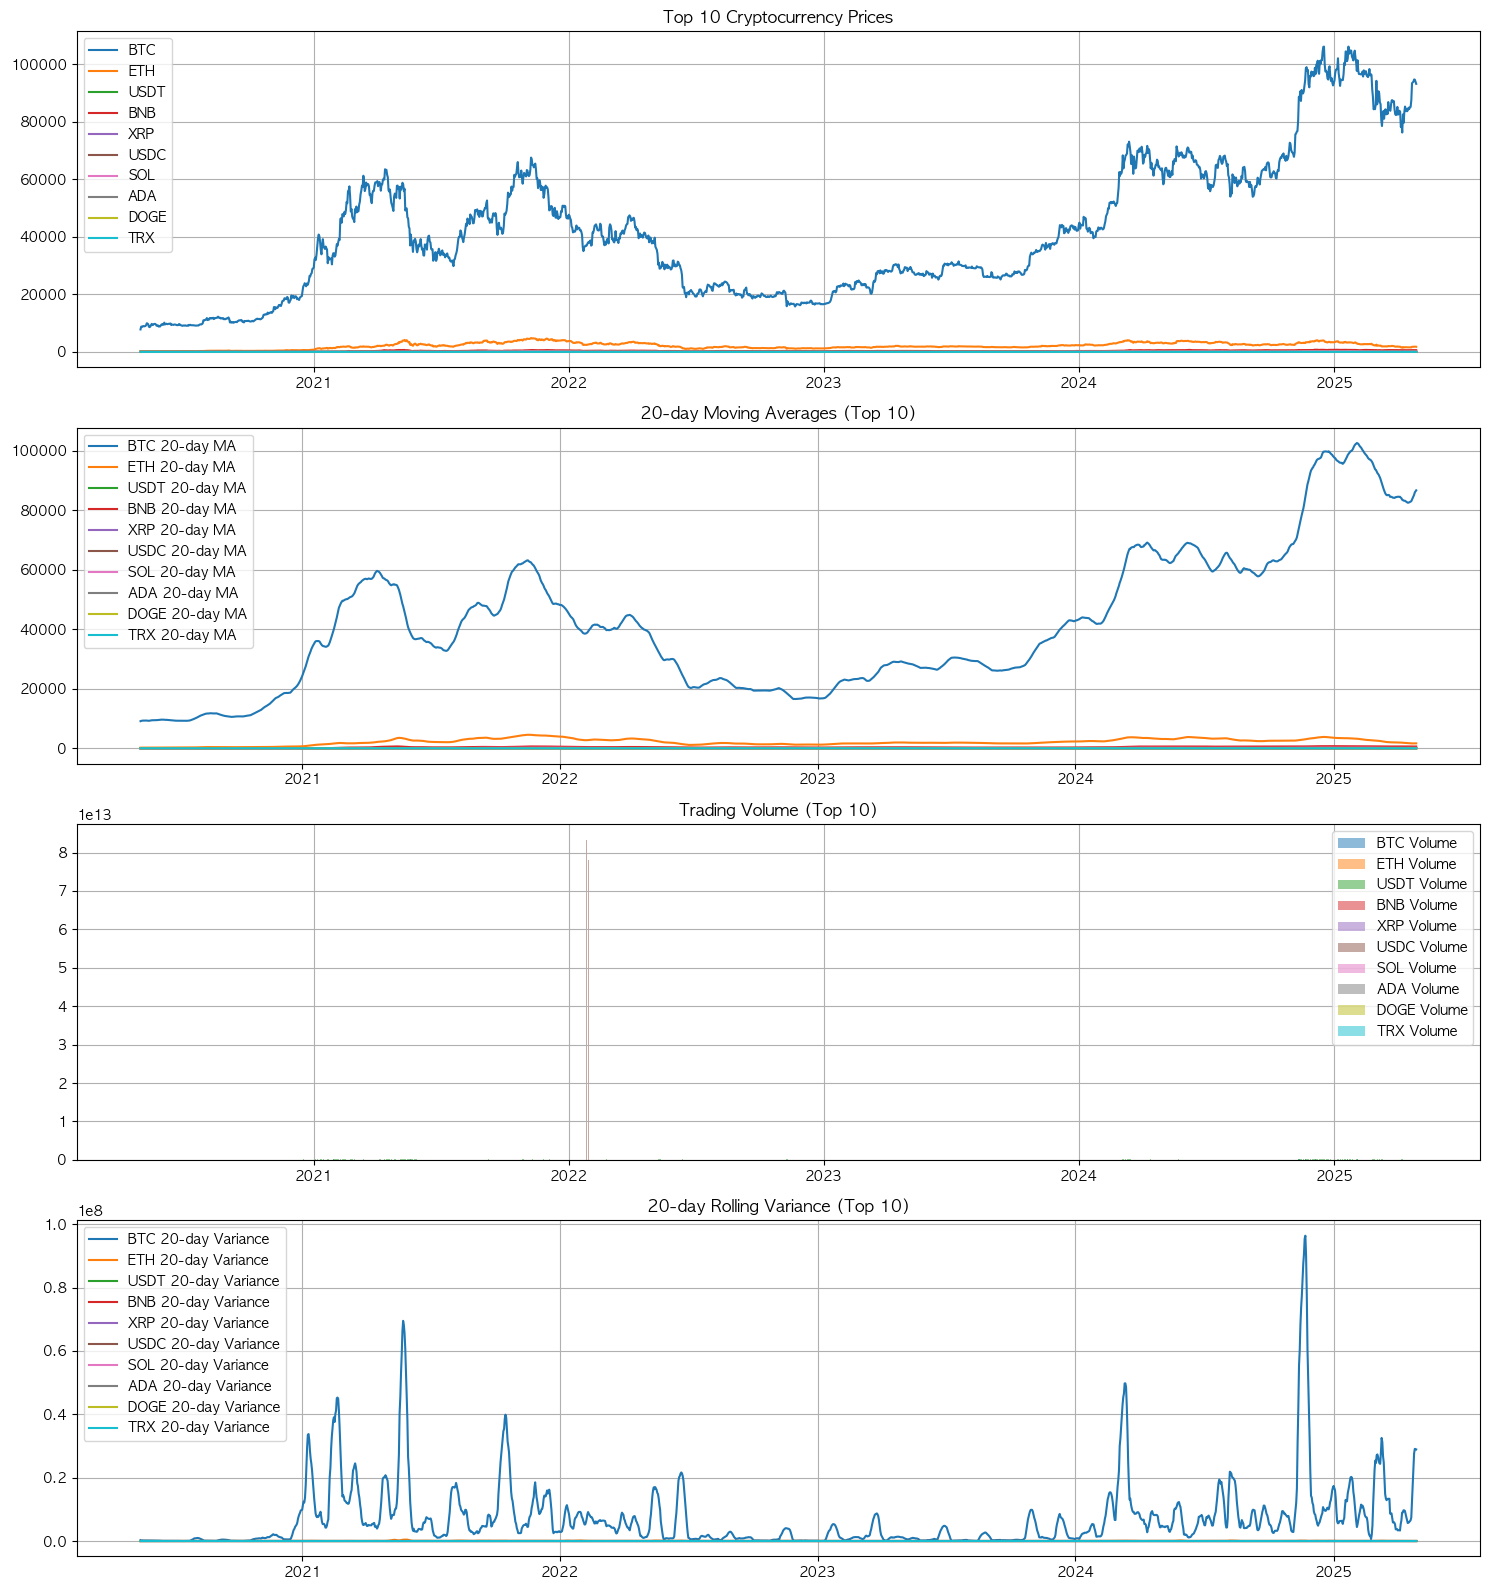


Summary Statistics for All Cryptocurrencies:

BTC:
Mean Price: $41688.21
Max Price: $106146.27
Min Price: $7807.06
Volatility: 23769.85

ETH:
Mean Price: $2128.17
Max Price: $4812.09
Min Price: $185.91
Volatility: 1061.52

USDT:
Mean Price: $1.00
Max Price: $1.02
Min Price: $0.99
Volatility: 0.00

BNB:
Mean Price: $346.26
Max Price: $750.27
Min Price: $15.10
Volatility: 195.96

XRP:
Mean Price: $0.72
Max Price: $3.30
Min Price: $0.18
Volatility: 0.58

USDC:
Mean Price: $1.00
Max Price: $1.01
Min Price: $0.97
Volatility: 0.00

SOL:
Mean Price: $75.59
Max Price: $261.87
Min Price: $0.52
Volatility: 70.84

ADA:
Mean Price: $0.67
Max Price: $2.97
Min Price: $0.05
Volatility: 0.56

DOGE:
Mean Price: $0.12
Max Price: $0.68
Min Price: $0.00
Volatility: 0.10

TRX:
Mean Price: $0.09
Max Price: $0.43
Min Price: $0.01
Volatility: 0.06

TON:
Mean Price: $3.23
Max Price: $24.72
Min Price: $0.02
Volatility: 3.10

DAI:
Mean Price: $1.00
Max Price: $1.04
Min Price: $0.97
Volatility: 0.00

LINK:
Mean 

In [20]:
# Create subplots for visualization
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 16))

# Plot prices (showing only top 10 by market cap for clarity)
for ticker in crypto_tickers[:10]:
    symbol = ticker.replace("-USD", "")
    if symbol in crypto_data:
        ax1.plot(crypto_data[symbol].index, crypto_data[symbol]['Close'], label=symbol)
ax1.set_title('Top 10 Cryptocurrency Prices')
ax1.legend()
ax1.grid(True)

# Calculate and plot 20-day moving averages
for ticker in crypto_tickers[:10]:
    symbol = ticker.replace("-USD", "")
    if symbol in crypto_data:
        ma = crypto_data[symbol]['Close'].rolling(window=20).mean()
        ax2.plot(crypto_data[symbol].index, ma, label=f'{symbol} 20-day MA')
ax2.set_title('20-day Moving Averages (Top 10)')
ax2.legend()
ax2.grid(True)

# Plot trading volumes
for ticker in crypto_tickers[:10]:
    symbol = ticker.replace("-USD", "")
    if symbol in crypto_data:
        ax3.bar(crypto_data[symbol].index, crypto_data[symbol]['Volume'], alpha=0.5, label=f'{symbol} Volume')
ax3.set_title('Trading Volume (Top 10)')
ax3.legend()
ax3.grid(True)

# Calculate and plot 20-day rolling variance
for ticker in crypto_tickers[:10]:
    symbol = ticker.replace("-USD", "")
    if symbol in crypto_data:
        var = crypto_data[symbol]['Close'].rolling(window=20).var()
        ax4.plot(crypto_data[symbol].index, var, label=f'{symbol} 20-day Variance')
ax4.set_title('20-day Rolling Variance (Top 10)')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for All Cryptocurrencies:")
for ticker in crypto_tickers:
    symbol = ticker.replace("-USD", "")
    if symbol in crypto_data:
        data = crypto_data[symbol]['Close']
        print(f"\n{symbol}:")
        print(f"Mean Price: ${data.mean():.2f}")
        print(f"Max Price: ${data.max():.2f}")
        print(f"Min Price: ${data.min():.2f}")
        print(f"Volatility: {data.std():.2f}")

In [21]:
# Perform clustering analysis on cryptocurrencies
print("\nPerforming clustering analysis on cryptocurrencies...")

# Prepare data for clustering - normalize prices to start at 100
crypto_prices = pd.DataFrame()
for ticker in crypto_tickers:
    symbol = ticker.replace("-USD", "")
    if symbol in crypto_data:
        crypto_prices[symbol] = crypto_data[symbol]['Close']

# Get period with complete data for all cryptos
valid_crypto_dates = crypto_prices.dropna(axis=0, how='any').index
complete_crypto_prices = crypto_prices.loc[valid_crypto_dates]
normalized_crypto_prices = complete_crypto_prices / complete_crypto_prices.iloc[0] * 100



Performing clustering analysis on cryptocurrencies...


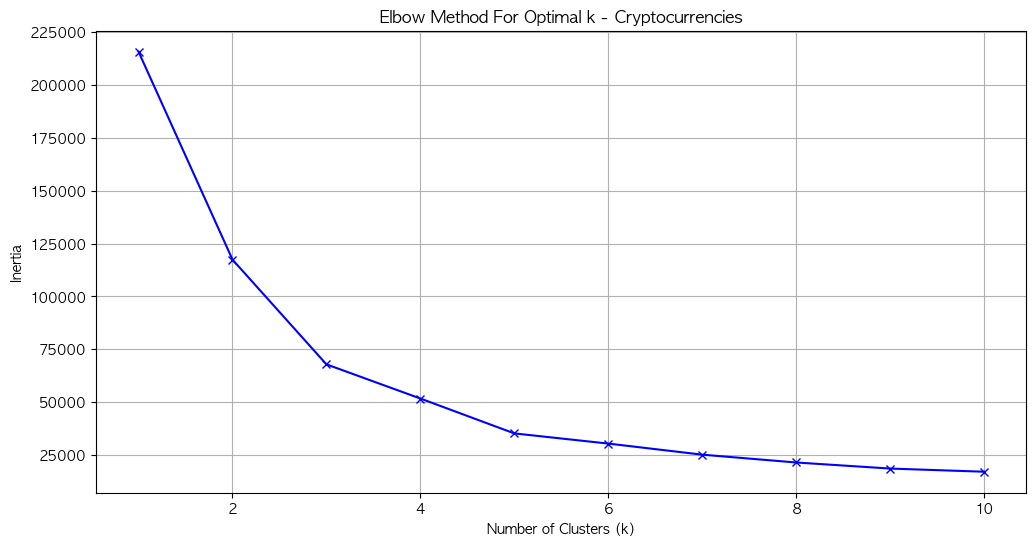

In [22]:

# Determine optimal number of clusters using elbow method
inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_crypto_prices.T)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(12, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k - Cryptocurrencies')
plt.grid(True)
plt.show()



Cluster 1 members (34 cryptocurrencies):
BTC, ETH, BNB, XRP, DOGE, TRX, TON, LINK, MATIC, DOT, WBTC, LTC, BCH, SHIB, XLM, UNI1, OKB, ATOM, XMR, ICP, FIL, HBAR, CRO, MKR, NEAR, GRT, ALGO, STX, THETA, INJ, SAND, MANA, FTM, XTZ

Cluster 2 members (7 cryptocurrencies):
SOL, ADA, AVAX, VET, AAVE, EGLD, RUNE

Cluster 3 members (7 cryptocurrencies):
USDT, USDC, DAI, LEO, APT, IMX, OP

Cluster 4 members (2 cryptocurrencies):
ETC, LDO


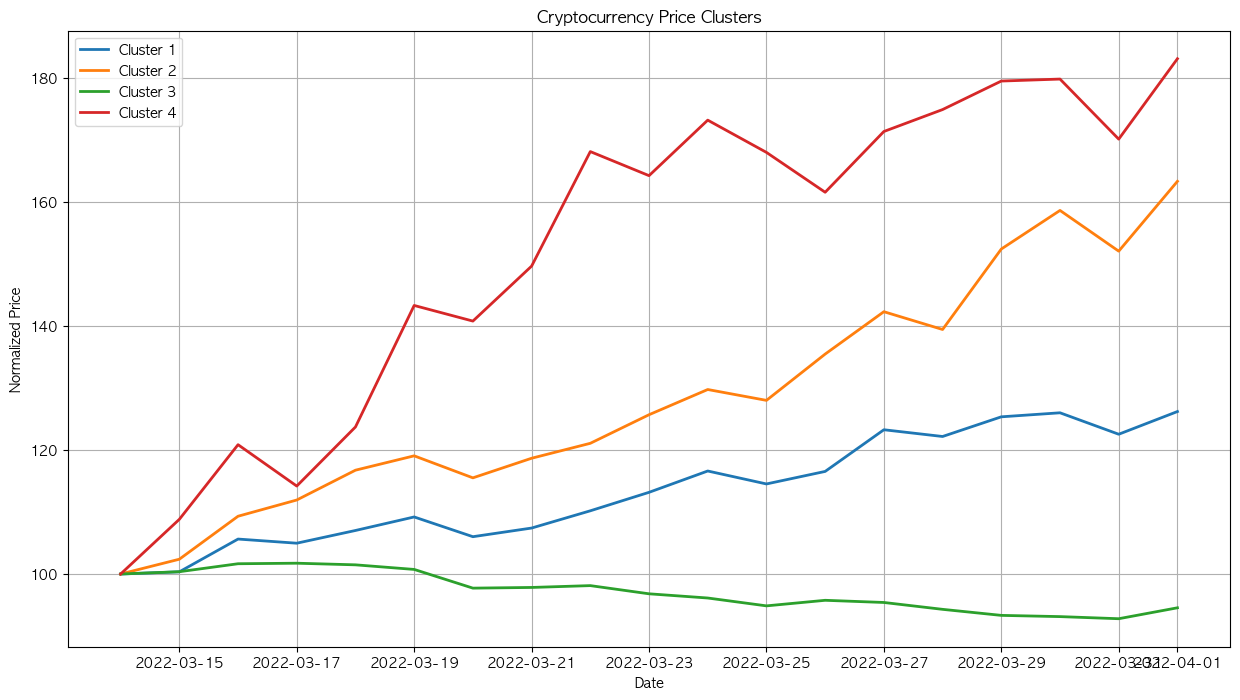


Cluster Summary Statistics:

Cluster 1:
Average Return: 0.0134
Return Std Dev: 0.0244

Cluster 2:
Average Return: 0.0287
Return Std Dev: 0.0352

Cluster 3:
Average Return: -0.0029
Return Std Dev: 0.0112

Cluster 4:
Average Return: 0.0375
Return Std Dev: 0.0645


In [23]:

# Choose optimal k and perform final clustering
optimal_k = 4  # Based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
crypto_clusters = kmeans.fit_predict(normalized_crypto_prices.T)

# Plot clusters
plt.figure(figsize=(15, 8))
for i in range(optimal_k):
    # Get cryptocurrencies in this cluster
    cluster_cryptos = normalized_crypto_prices.columns[crypto_clusters == i]
    
    # Plot mean trajectory of cluster
    cluster_mean = normalized_crypto_prices[cluster_cryptos].mean(axis=1)
    plt.plot(normalized_crypto_prices.index, cluster_mean, linewidth=2, label=f'Cluster {i+1}')
    
    # Print cluster members
    print(f"\nCluster {i+1} members ({len(cluster_cryptos)} cryptocurrencies):")
    print(', '.join(cluster_cryptos))

plt.title('Cryptocurrency Price Clusters')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate summary statistics for each cluster
print("\nCluster Summary Statistics:")
for i in range(optimal_k):
    cluster_cryptos = normalized_crypto_prices.columns[crypto_clusters == i]
    cluster_returns = complete_crypto_prices[cluster_cryptos].pct_change().mean(axis=1)
    print(f"\nCluster {i+1}:")
    print(f"Average Return: {cluster_returns.mean():.4f}")
    print(f"Return Std Dev: {cluster_returns.std():.4f}")


Analyzing Crypto Cluster 1
Best pair: BTC - WBTC (correlation: 0.9999)


/var/folders/cp/7c6k737x57g8s1kf7jnph2rm0000gn/T/ipykernel_10912/4245529685.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if z_score[i] > entry_threshold:
/var/folders/cp/7c6k737x57g8s1kf7jnph2rm0000gn/T/ipykernel_10912/4245529685.py:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif z_score[i] < -entry_threshold:
/var/folders/cp/7c6k737x57g8s1kf7jnph2rm0000gn/T/ipykernel_10912/4245529685.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, us

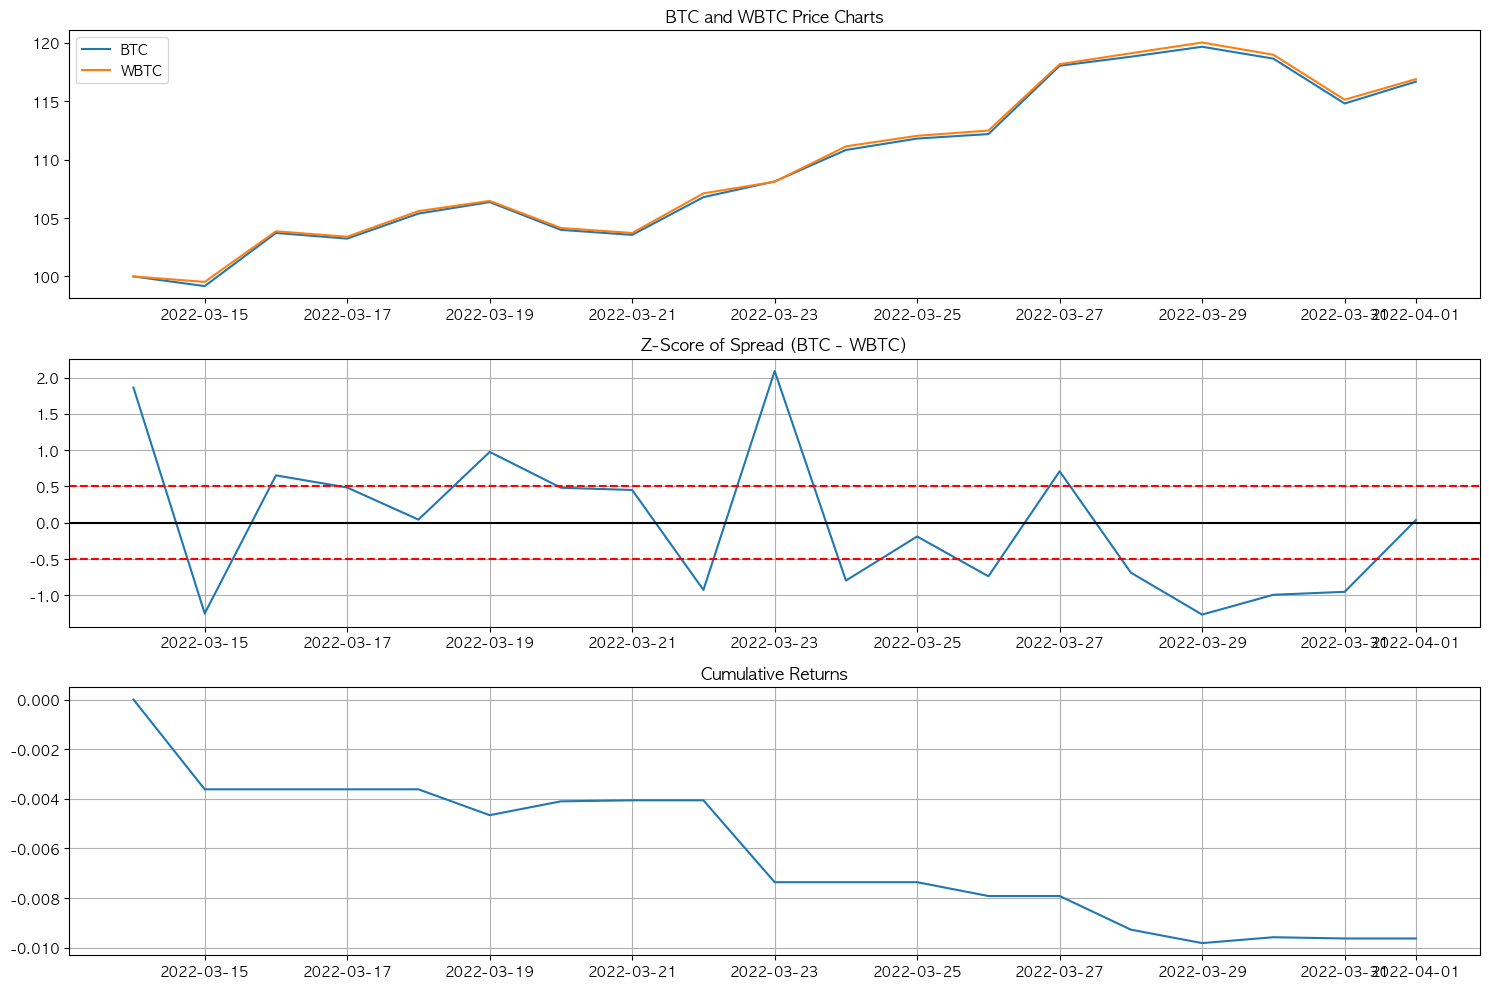

Sharpe Ratio: -7.32
Total Return: -0.96%

Analyzing Crypto Cluster 2
Best pair: ADA - EGLD (correlation: 0.9562)


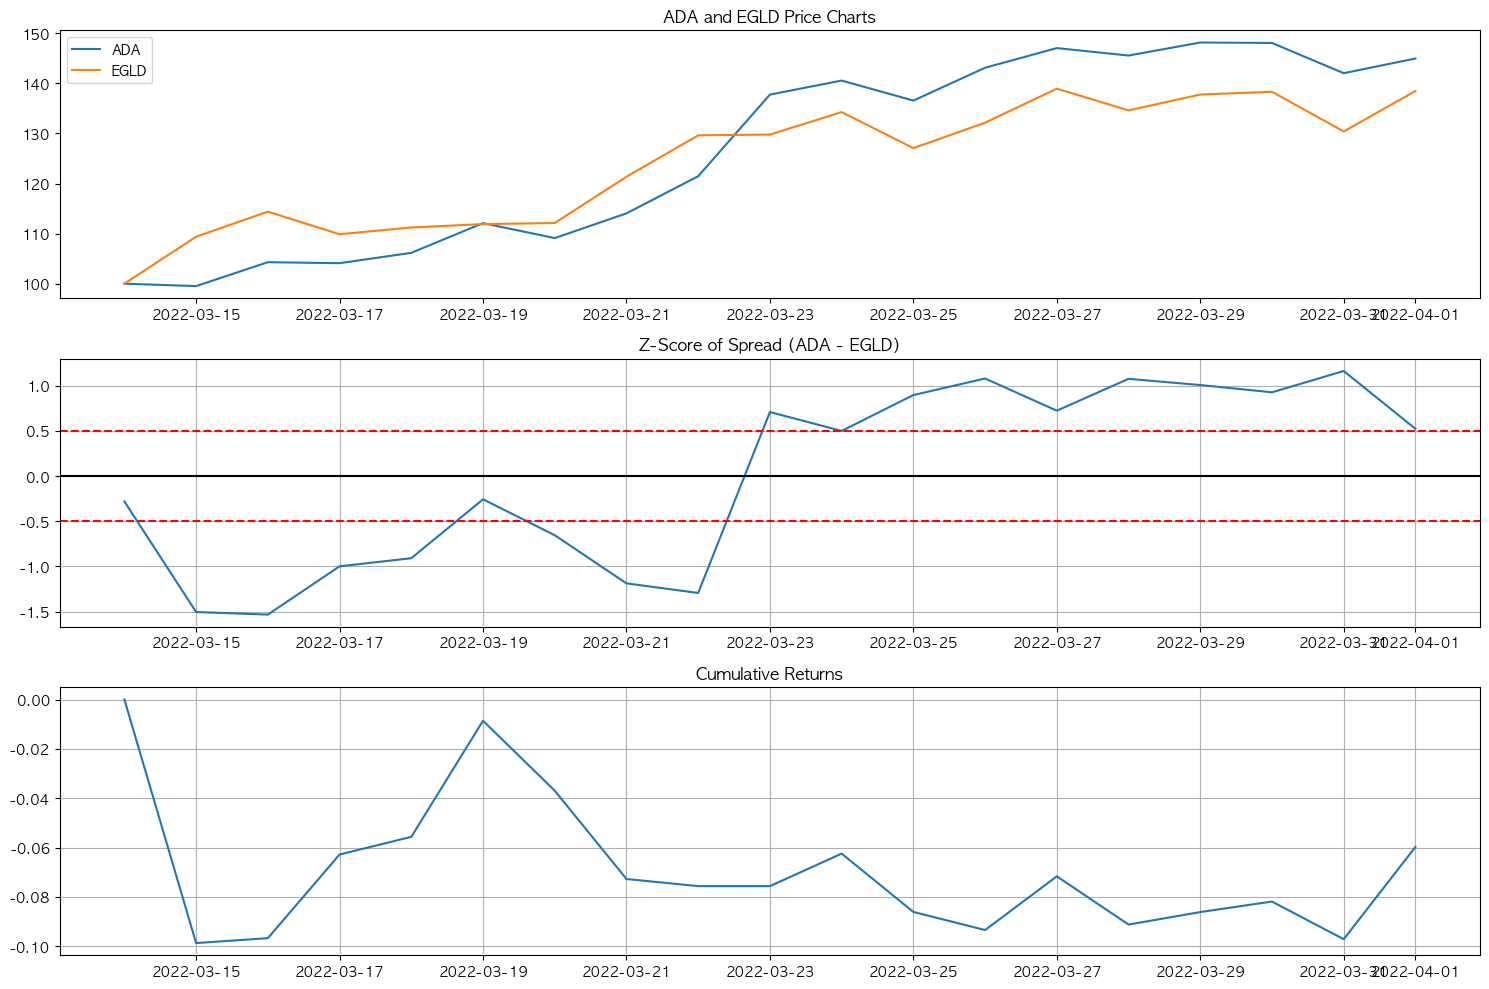

Sharpe Ratio: -1.33
Total Return: -5.97%

Analyzing Crypto Cluster 3
Best pair: APT - IMX (correlation: 0.8376)


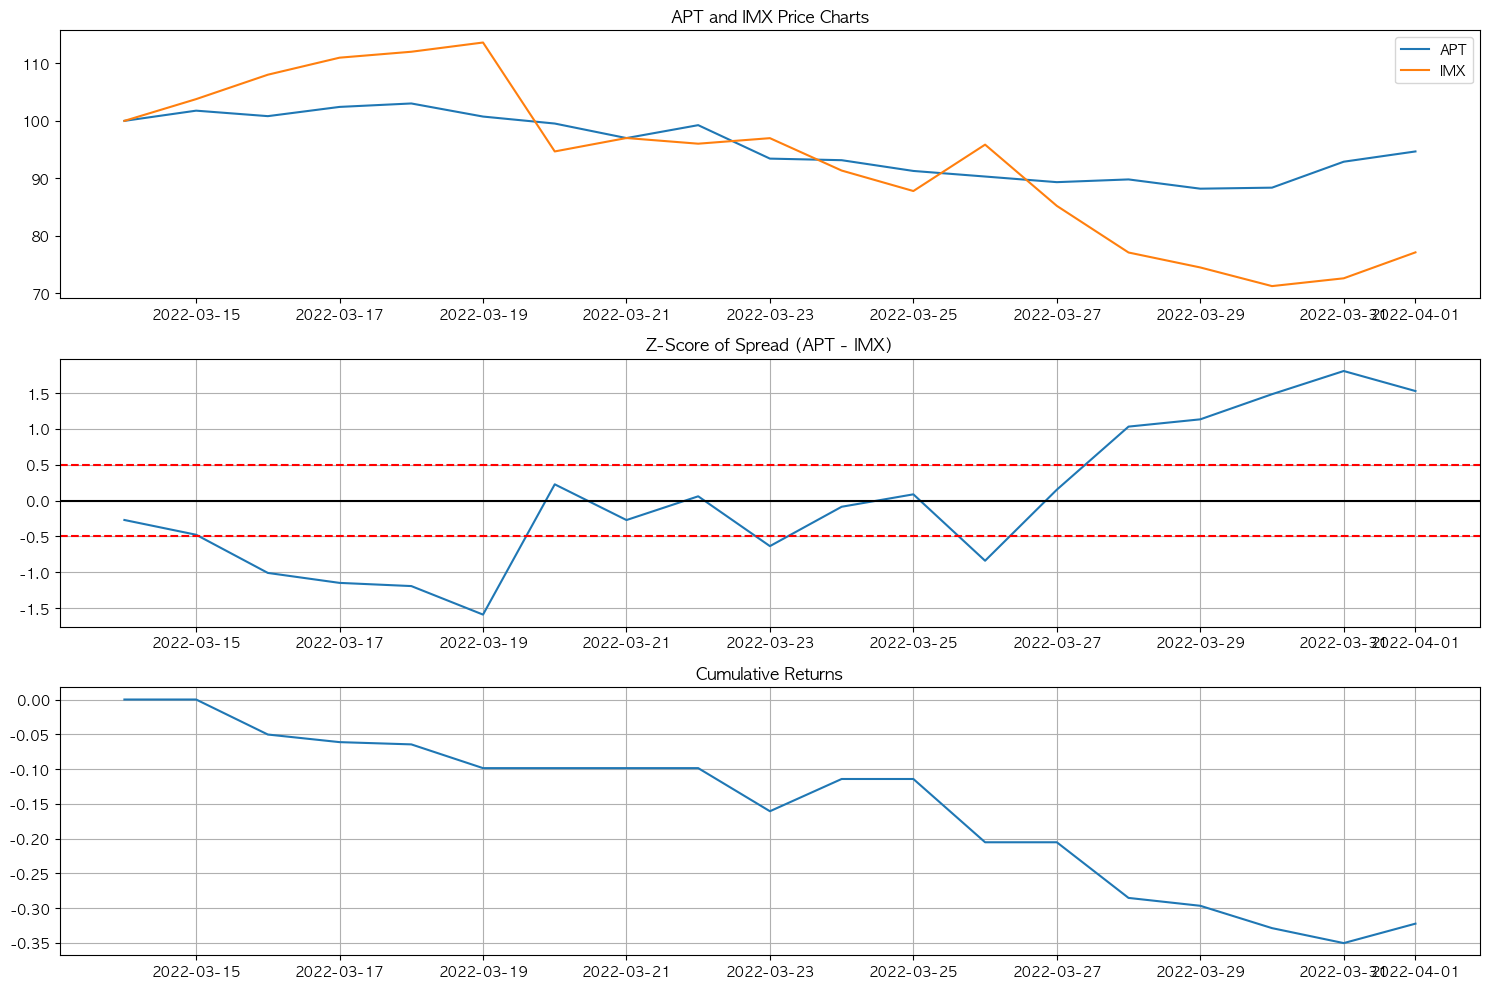

Sharpe Ratio: -7.70
Total Return: -32.24%

Analyzing Crypto Cluster 4
Best pair: ETC - LDO (correlation: 0.8088)


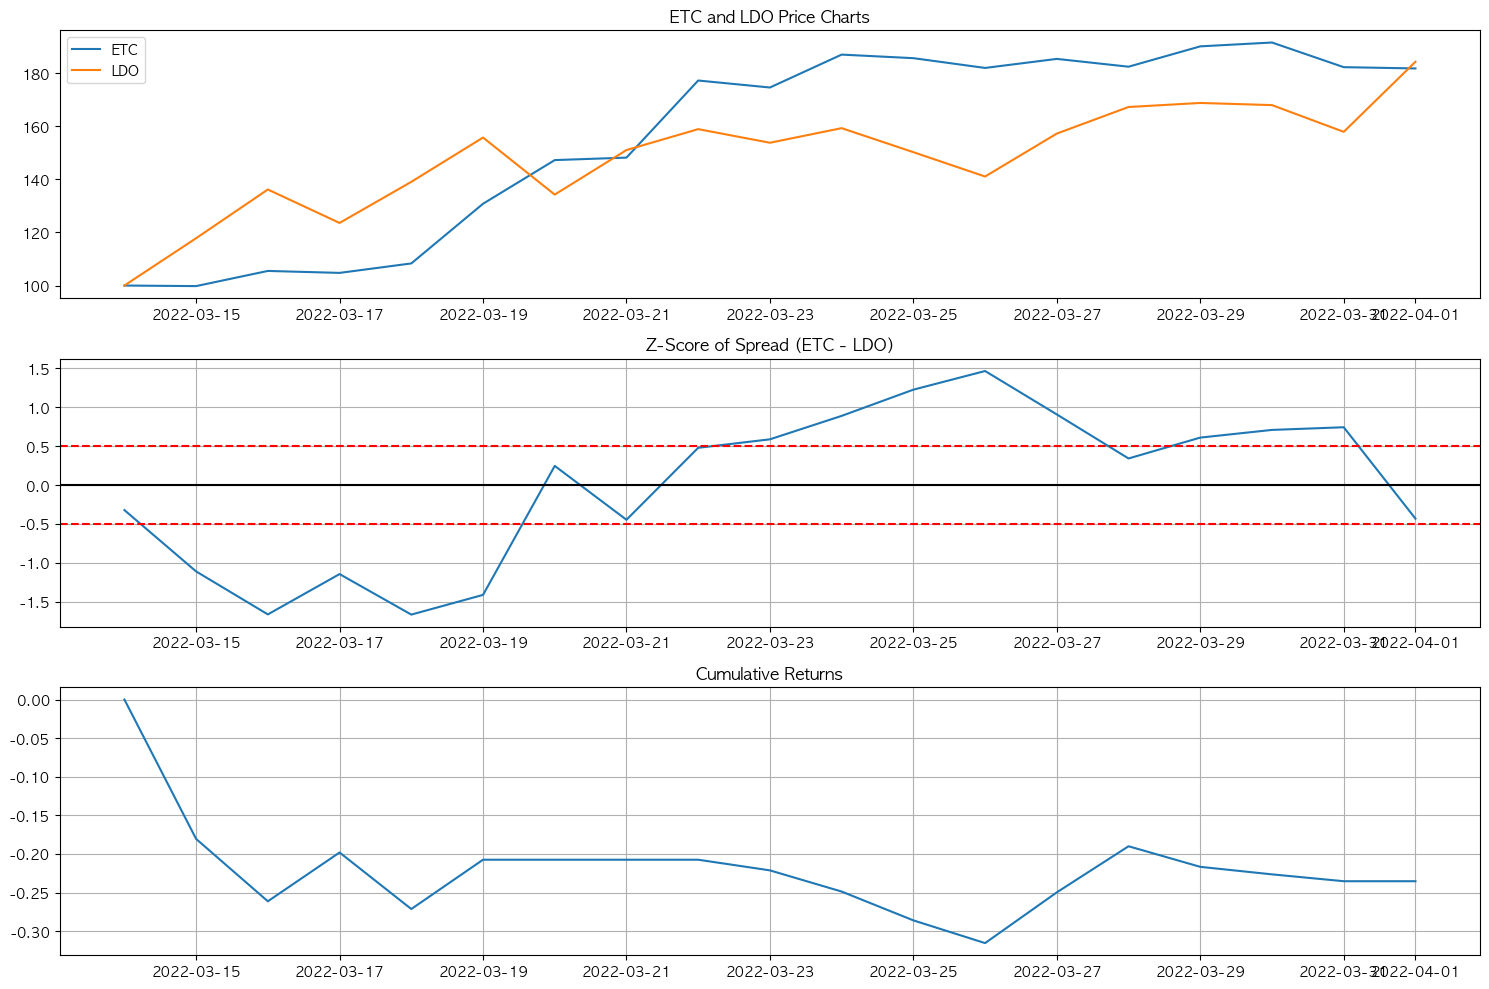

Sharpe Ratio: -2.76
Total Return: -23.53%

Overall Crypto Strategy Summary:

Cluster_1:
Pair: BTC - WBTC
Correlation: 0.9999
Sharpe Ratio: -7.32
Total Return: -0.96%

Cluster_2:
Pair: ADA - EGLD
Correlation: 0.9562
Sharpe Ratio: -1.33
Total Return: -5.97%

Cluster_3:
Pair: APT - IMX
Correlation: 0.8376
Sharpe Ratio: -7.70
Total Return: -32.24%

Cluster_4:
Pair: ETC - LDO
Correlation: 0.8088
Sharpe Ratio: -2.76
Total Return: -23.53%


In [24]:
# Implement statistical arbitrage strategy for cryptocurrencies
selected_clusters = [0,1,2,3]  # Select first two clusters for analysis

# Dictionary to store results
crypto_pair_trading_results = {}

for cluster_idx in selected_clusters:
    print(f"\nAnalyzing Crypto Cluster {cluster_idx + 1}")
    
    # Get cryptocurrencies in this cluster
    cluster_cryptos = normalized_crypto_prices.columns[crypto_clusters == cluster_idx]
    cluster_prices = normalized_crypto_prices[cluster_cryptos]
    
    # Calculate all possible pairs in the cluster
    pairs = []
    correlations = []
    for i in range(len(cluster_cryptos)):
        for j in range(i+1, len(cluster_cryptos)):
            crypto1, crypto2 = cluster_cryptos[i], cluster_cryptos[j]
            correlation = cluster_prices[crypto1].corr(cluster_prices[crypto2])
            pairs.append((crypto1, crypto2))
            correlations.append(correlation)
    
    # Select the pair with highest correlation
    best_pair_idx = np.argmax(correlations)
    crypto1, crypto2 = pairs[best_pair_idx]
    correlation = correlations[best_pair_idx]
    
    print(f"Best pair: {crypto1} - {crypto2} (correlation: {correlation:.4f})")
    
    # Calculate spread
    spread = cluster_prices[crypto1] - cluster_prices[crypto2]

    # Calculate z-score of spread
    z_score = (spread - spread.mean()) / spread.std()
    
    # Define trading signals
    entry_threshold = 0.5  # Enter position when |z-score| > 0.5
    exit_threshold = 0.0   # Exit position when z-score crosses 0
    
    # Initialize position and returns arrays
    position = np.zeros(len(z_score))
    returns = np.zeros(len(z_score))
    # Implement trading strategy
    for i in range(1, len(z_score)):
        # If no position is open
        if position[i-1] == 0:
            if z_score[i] > entry_threshold:
                position[i] = -1  # Short crypto1, long crypto2
            elif z_score[i] < -entry_threshold:
                position[i] = 1   # Long crypto1, short crypto2
        # If position is open
        else:
            if (position[i-1] == 1 and z_score[i] > exit_threshold) or \
               (position[i-1] == -1 and z_score[i] < exit_threshold):
                position[i] = 0   # Close position
            else:
                position[i] = position[i-1]  # Maintain position
        
        # Calculate returns
        if position[i] != 0:
            crypto1_return = (cluster_prices[crypto1].iloc[i] / cluster_prices[crypto1].iloc[i-1] - 1)
            crypto2_return = (cluster_prices[crypto2].iloc[i] / cluster_prices[crypto2].iloc[i-1] - 1)
            returns[i] = position[i] * (crypto1_return - crypto2_return)
    
    # Calculate strategy metrics
    cumulative_returns = np.cumprod(1 + returns) - 1
    sharpe_ratio = np.sqrt(252) * returns.mean() / returns.std()
    
    # Store results
    crypto_pair_trading_results[f"Cluster_{cluster_idx + 1}"] = {
        'pair': (crypto1, crypto2),
        'correlation': correlation,
        'cumulative_returns': cumulative_returns,
        'sharpe_ratio': sharpe_ratio
    }
    
    # Plot results

    plt.figure(figsize=(15, 10))
    
    plt.subplot(3, 1, 1)
    plt.plot(cluster_prices.index, cluster_prices[crypto1], label=crypto1)
    plt.plot(cluster_prices.index, cluster_prices[crypto2], label=crypto2)
    plt.title(f'{crypto1} and {crypto2} Price Charts')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(cluster_prices.index, z_score)
    plt.axhline(y=entry_threshold, color='r', linestyle='--')
    plt.axhline(y=-entry_threshold, color='r', linestyle='--')
    plt.axhline(y=0, color='k', linestyle='-')
    plt.title(f'Z-Score of Spread ({crypto1} - {crypto2})')
    plt.grid(True)
    
    plt.subplot(3, 1, 3)
    plt.plot(cluster_prices.index, cumulative_returns)
    plt.title('Cumulative Returns')
    plt.grid(True)


    
    plt.tight_layout()
    plt.show()
    
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Total Return: {cumulative_returns[-1]:.2%}")

# Print overall summar
print("\nOverall Crypto Strategy Summary:")
for cluster, results in crypto_pair_trading_results.items():
    print(f"\n{cluster}:")
    print(f"Pair: {results['pair'][0]} - {results['pair'][1]}")
    print(f"Correlation: {results['correlation']:.4f}")
    print(f"Sharpe Ratio: {results['sharpe_ratio']:.2f}")
    print(f"Total Return: {results['cumulative_returns'][-1]:.2%}")

In [25]:
mean_returns_longshort = pd.DataFrame([results['cumulative_returns'][-1] for results in crypto_pair_trading_results.values()])
mean_returns_longshort.mean()

0   -0.156761
dtype: float64


Analyzing Crypto Cluster 1
Best pair: BTC - WBTC (correlation: 0.9999)


/var/folders/cp/7c6k737x57g8s1kf7jnph2rm0000gn/T/ipykernel_10912/3241569371.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if z_score[i] < -entry_threshold:
/var/folders/cp/7c6k737x57g8s1kf7jnph2rm0000gn/T/ipykernel_10912/3241569371.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if position[i-1] == 1 and z_score[i] > exit_threshold:


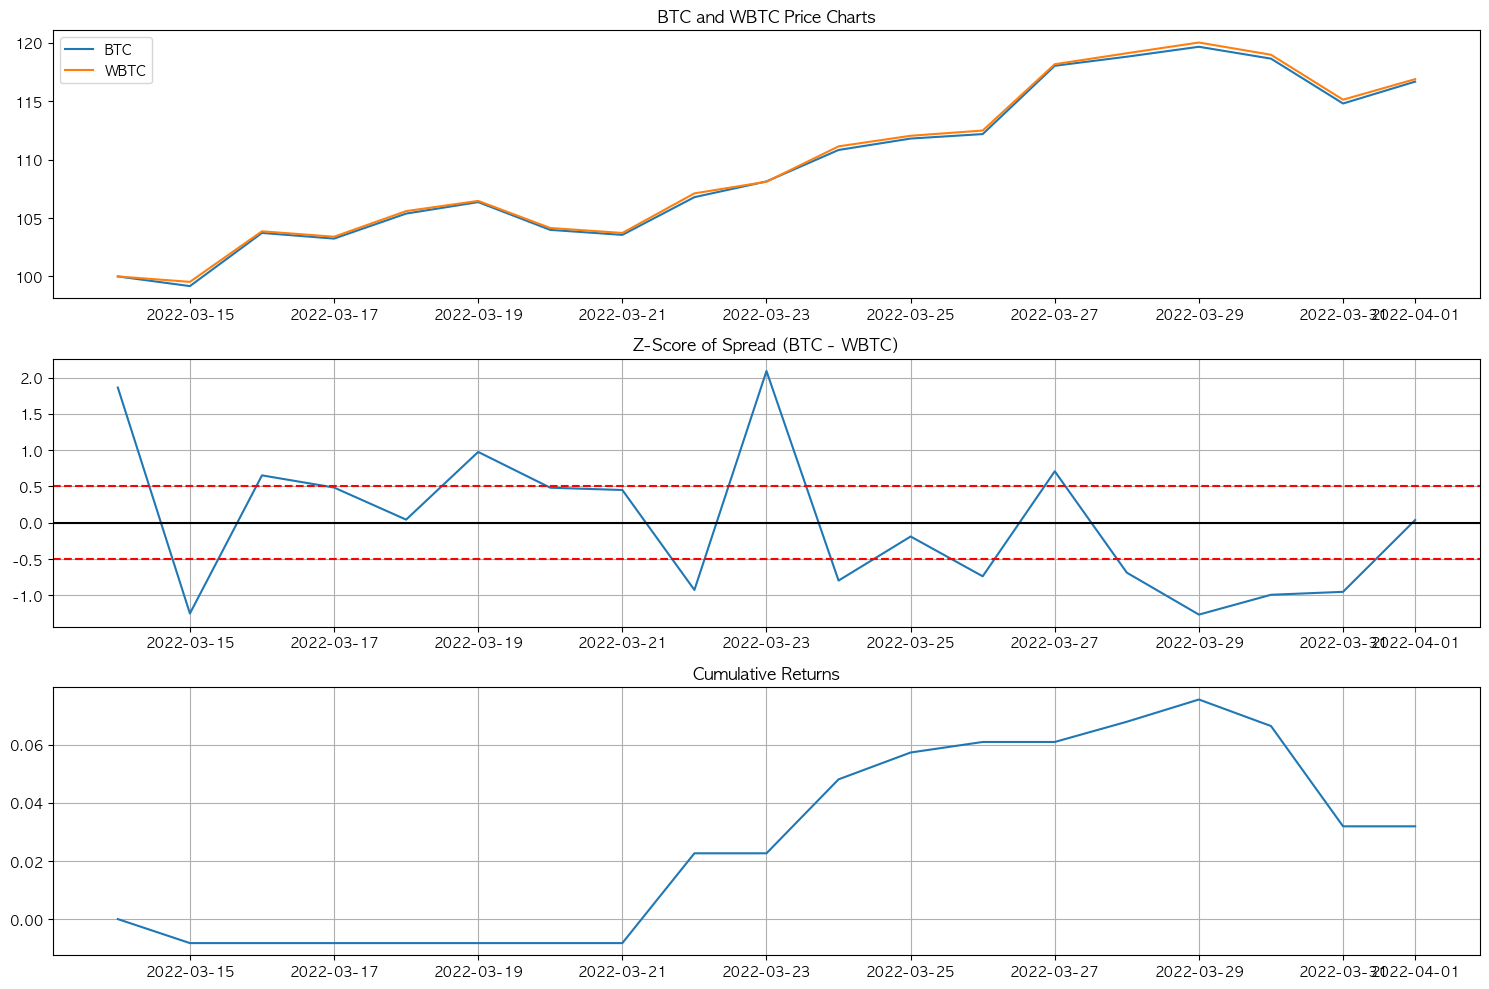

Sharpe Ratio: 2.22
Total Return: 3.19%

Analyzing Crypto Cluster 2
Best pair: ADA - EGLD (correlation: 0.9562)


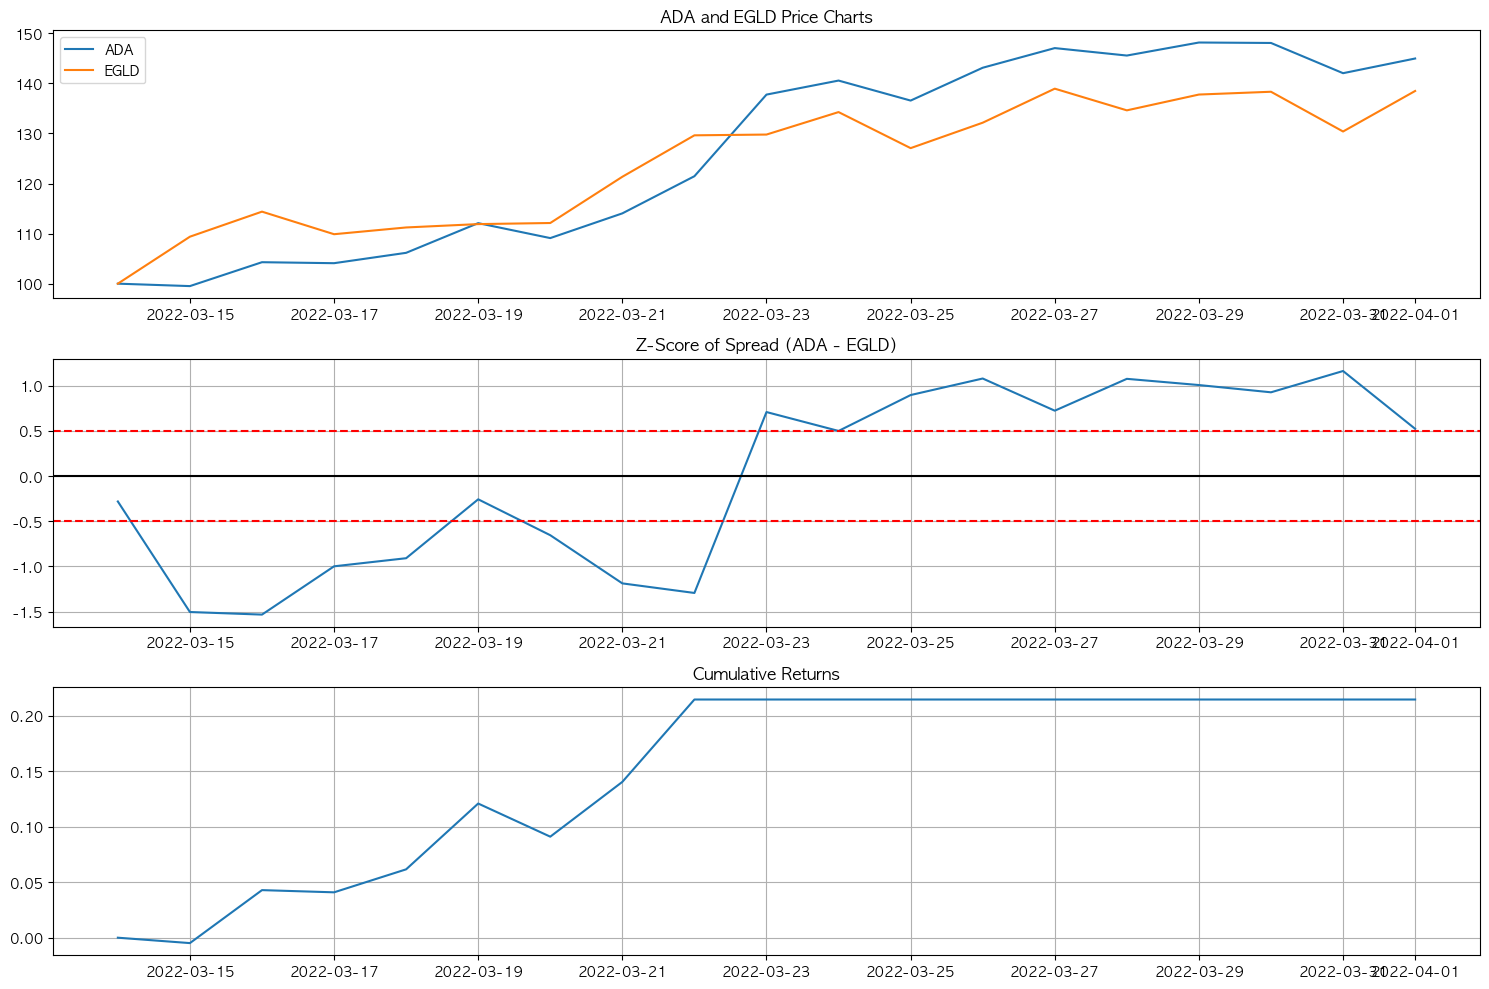

Sharpe Ratio: 7.06
Total Return: 21.46%

Analyzing Crypto Cluster 3
Best pair: APT - IMX (correlation: 0.8376)


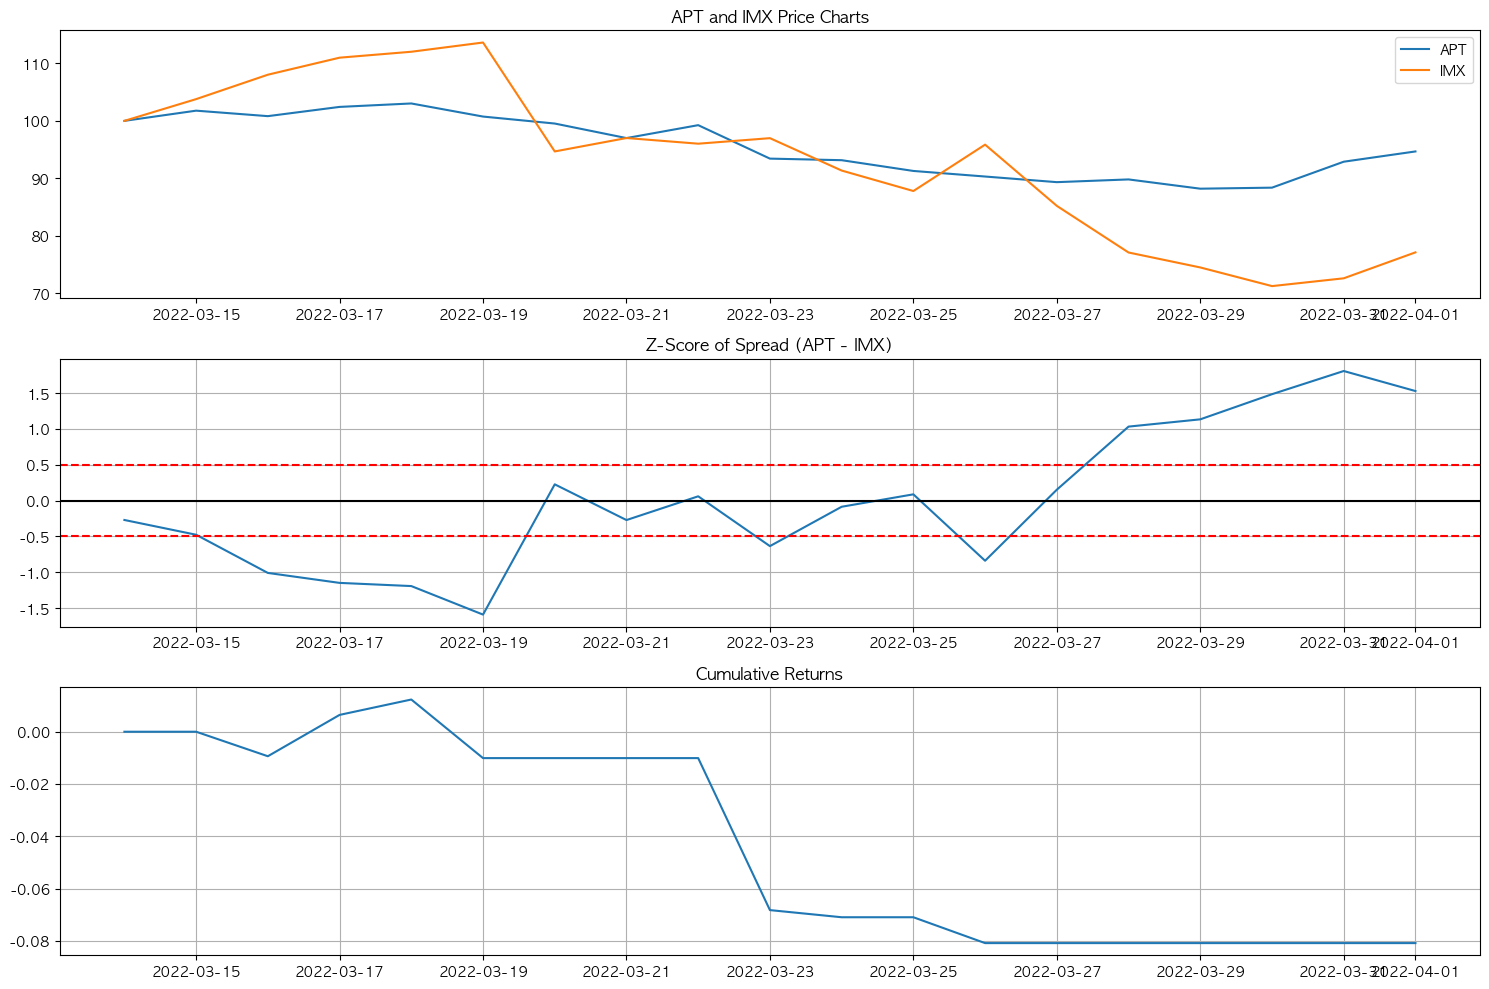

Sharpe Ratio: -4.67
Total Return: -8.09%

Analyzing Crypto Cluster 4
Best pair: ETC - LDO (correlation: 0.8088)


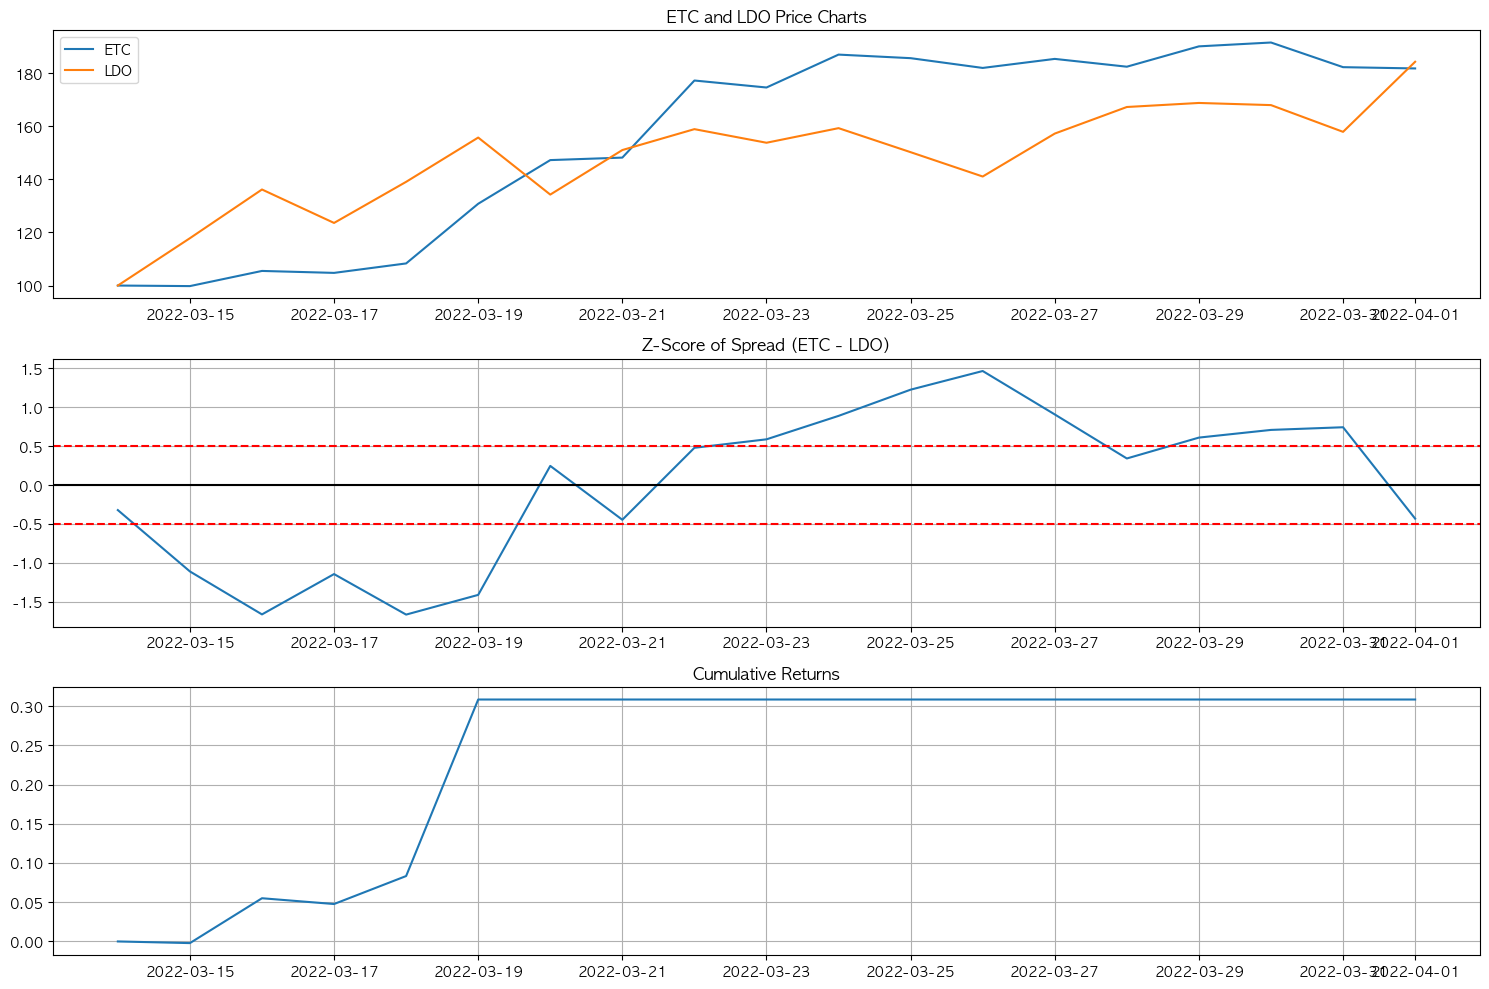

Sharpe Ratio: 5.08
Total Return: 30.83%

Overall Crypto Strategy Summary:

Cluster_1:
Pair: BTC - WBTC
Correlation: 0.9999
Sharpe Ratio: 2.22
Total Return: 3.19%

Cluster_2:
Pair: ADA - EGLD
Correlation: 0.9562
Sharpe Ratio: 7.06
Total Return: 21.46%

Cluster_3:
Pair: APT - IMX
Correlation: 0.8376
Sharpe Ratio: -4.67
Total Return: -8.09%

Cluster_4:
Pair: ETC - LDO
Correlation: 0.8088
Sharpe Ratio: 5.08
Total Return: 30.83%


In [26]:

crypto_pair_trading_results = {}

for cluster_idx in selected_clusters:
    print(f"\nAnalyzing Crypto Cluster {cluster_idx + 1}")
    
    # Get cryptocurrencies in this cluster
    cluster_cryptos = normalized_crypto_prices.columns[crypto_clusters == cluster_idx]
    cluster_prices = normalized_crypto_prices[cluster_cryptos]
    
    # Calculate all possible pairs in the cluster
    pairs = []
    correlations = []
    for i in range(len(cluster_cryptos)):
        for j in range(i+1, len(cluster_cryptos)):
            crypto1, crypto2 = cluster_cryptos[i], cluster_cryptos[j]
            correlation = cluster_prices[crypto1].corr(cluster_prices[crypto2])
            pairs.append((crypto1, crypto2))
            correlations.append(correlation)
    
    # Select the pair with highest correlation
    best_pair_idx = np.argmax(correlations)
    crypto1, crypto2 = pairs[best_pair_idx]
    correlation = correlations[best_pair_idx]
    
    print(f"Best pair: {crypto1} - {crypto2} (correlation: {correlation:.4f})")
    
    # Calculate spread
    spread = cluster_prices[crypto1] - cluster_prices[crypto2]

    # Calculate z-score of spread
    z_score = (spread - spread.mean()) / spread.std()
    
    # Define trading signals
    entry_threshold = 0.5  # Enter position when |z-score| > 0.5
    exit_threshold = 0.0   # Exit position when z-score crosses 0
    
    # Initialize position and returns arrays
    position = np.zeros(len(z_score))
    returns = np.zeros(len(z_score))
    
    # Implement trading strategy
    for i in range(1, len(z_score)):
        # If no position is open
        if position[i-1] == 0:
            if z_score[i] < -entry_threshold:
                position[i] = 1   # Long crypto1 only
        # If position is open
        else:
            if position[i-1] == 1 and z_score[i] > exit_threshold:
                position[i] = 0   # Close position
            else:
                position[i] = position[i-1]  # Maintain position
        
        # Calculate returns for long-only positions
        if position[i] == 1:  # Long crypto1
            crypto1_return = (cluster_prices[crypto1].iloc[i] / cluster_prices[crypto1].iloc[i-1] - 1)
            returns[i] = crypto1_return
    
    # Calculate strategy metrics
    cumulative_returns = np.cumprod(1 + returns) - 1
    sharpe_ratio = np.sqrt(252) * returns.mean() / returns.std()
    
    # Store results
    crypto_pair_trading_results[f"Cluster_{cluster_idx + 1}"] = {
        'pair': (crypto1, crypto2),
        'correlation': correlation,
        'cumulative_returns': cumulative_returns,
        'sharpe_ratio': sharpe_ratio
    }
    
    # Plot results
    plt.figure(figsize=(15, 10))
    
    plt.subplot(3, 1, 1)
    plt.plot(cluster_prices.index, cluster_prices[crypto1], label=crypto1)
    plt.plot(cluster_prices.index, cluster_prices[crypto2], label=crypto2)
    plt.title(f'{crypto1} and {crypto2} Price Charts')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(cluster_prices.index, z_score)
    plt.axhline(y=entry_threshold, color='r', linestyle='--')
    plt.axhline(y=-entry_threshold, color='r', linestyle='--')
    plt.axhline(y=0, color='k', linestyle='-')
    plt.title(f'Z-Score of Spread ({crypto1} - {crypto2})')
    plt.grid(True)
    
    plt.subplot(3, 1, 3)
    plt.plot(cluster_prices.index, cumulative_returns)
    plt.title('Cumulative Returns')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Total Return: {cumulative_returns[-1]:.2%}")

# Print overall summary
print("\nOverall Crypto Strategy Summary:")
for cluster, results in crypto_pair_trading_results.items():
    print(f"\n{cluster}:")
    print(f"Pair: {results['pair'][0]} - {results['pair'][1]}")
    print(f"Correlation: {results['correlation']:.4f}")
    print(f"Sharpe Ratio: {results['sharpe_ratio']:.2f}")
    print(f"Total Return: {results['cumulative_returns'][-1]:.2%}")

In [27]:
# %%
mean_returns_longonly = pd.DataFrame([results['cumulative_returns'][-1] for results in crypto_pair_trading_results.values()])
mean_returns_longonly.mean()

0    0.118495
dtype: float64